In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import openpyxl
import string 
import re #regex library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
import nltk
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 1. Pengambilan Data
Data berjumlah 4000 tweet dengan keyword “nikah muda” berbahasa Indonesia yang diambil dari Twitter pada bulan Maret dan April 2023 menggunakan Snscrape dan disimpan dalam bentuk file xlsx.

In [4]:
query = "nikah muda lang:id since:2023-03-01 until:2023-04-01"
tweets = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= 2000:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])

maret = pd.DataFrame(tweets, columns = ['date','username','tweet'])
maret['date'] = maret['date'].dt.tz_localize(None)
maret.to_excel('maret.xlsx', index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19368\533651337.py:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content])
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287b2f6305ca9eb6'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287b9dba885e4f4f'
Skipping unrecognised entry ID: 'promoted-tweet-1665786573189943296-287b01ea701bd2f5'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287b1e8807775d9c'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287b26aa0451df35'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-287ba768effc0120'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287b46e5d65f98ac'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287bcdd73f589f63'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-287bc4222e10e9e8'
Skipping unrecognised

Skipping unrecognised entry ID: 'promoted-tweet-1660926036874330117-287c6c42fdaf8d30'
Skipping unrecognised entry ID: 'promoted-tweet-1664165035508387842-287c6fb8ba15f377'
Skipping unrecognised entry ID: 'promoted-tweet-1668300091889709056-287cc3ffd09217b8'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287c511e4119cb4a'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287c8a1200df0b0d'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287c0ff21daa2076'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287c3a597d2b49c2'
Skipping unrecognised entry ID: 'promoted-tweet-1664542366726799360-287c28cd67569fa5'
Skipping unrecognised entry ID: 'promoted-tweet-1668300091889709056-287ceb230f2e38b1'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287c8650c154b09b'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287cc2de0b0c9273'
Skipping unrecognised entry ID: 'promoted-tweet-166562

Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287c05775cd26a97'
Skipping unrecognised entry ID: 'promoted-tweet-1669978255854645248-287cf5fa1402a91c'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287c8da3f961ea97'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287ca30874d7e754'
Skipping unrecognised entry ID: 'promoted-tweet-1668300091889709056-287c3c0877fcadd5'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287cc4c9d7fc310d'
Skipping unrecognised entry ID: 'promoted-tweet-1666755024268177408-287c5a4697d3f9f5'
Skipping unrecognised entry ID: 'promoted-tweet-1660926036874330117-287cdf4e14d516d6'
Skipping unrecognised entry ID: 'promoted-tweet-1665799538110496771-287cd06ced8d2016'
Skipping unrecognised entry ID: 'promoted-tweet-1669978255854645248-287c4e6b310b8657'
Skipping unrecognised entry ID: 'promoted-tweet-1665999467907252224-287c6054b0b6f66a'
Skipping unrecognised entry ID: 'promoted-tweet-166562

Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-287cef7fd9eb1357'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287c59cb19cba6ad'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287c51488c8e80c4'
Skipping unrecognised entry ID: 'promoted-tweet-1660926036874330117-287cd676d058129c'
Skipping unrecognised entry ID: 'promoted-tweet-1660926036874330117-287cf8ff7365e9f8'
Skipping unrecognised entry ID: 'promoted-tweet-1501125822102622211-287cd1a5819e3eb1'
Skipping unrecognised entry ID: 'promoted-tweet-1665799538110496771-287cc77302960e96'
Skipping unrecognised entry ID: 'promoted-tweet-1656358958230040586-287c8af339325d1f'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-287cd885522b3a14'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287ce5e3a52cf213'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-287c67738b79b3b8'
Skipping unrecognised entry ID: 'promoted-tweet-166562

In [6]:
query = "nikah muda lang:id since:2023-04-01 until:2023-05-01"
tweets = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= 2000:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])

april = pd.DataFrame(tweets, columns = ['date','username','tweet'])
april['date'] = april['date'].dt.tz_localize(None)
april.to_excel('april.xlsx', index=False)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19368\2046255979.py:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content])
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289c9f0bb98336c9'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289c03ea987fa80e'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c9e765cdba9aa'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289cf1cce8146942'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289c59ad530a73c8'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c31d91af45cf3'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289cb5b61ef20392'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289c81ef9da8b3c5'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289cea40e1a7db43'
Skipping unrecognise

Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c29583b97a470'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c4b43b3337431'
Skipping unrecognised entry ID: 'promoted-tweet-1660926036874330117-289c9e25ad0ceced'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289cae27b540a28b'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289c4f9d5896eef7'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289ce0ad2f9667f2'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289c2dff230a9104'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289ca2960f5fe605'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c73842b74816a'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289c8e3cb297e1da'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289cb89605bcee7f'
Skipping unrecognised entry ID: 'promoted-tweet-166826

Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c8bd9e58ed4da'
Unavailable user in card on tweet 1650544454632374272
Unavailable user in card on tweet 1650544454632374272
User 796749554 not found in user refs in card on tweet 1650544454632374272
User 796749554 not found in user refs in card on tweet 1650544454632374272
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289c9c4b436776e3'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289cb5fe907e54a0'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c4ed35f30a353'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289cc41f208b2050'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289c8187f26c2355'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c591ac4fc7448'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289c722ebcea5367'
Skipping unrecognised entry ID: 'promoted-tweet-166675

Skipping unrecognised entry ID: 'promoted-tweet-1668300091889709056-289cd613b067ea2b'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289cec4b8e6b9b66'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289ca49da19a5894'
Skipping unrecognised entry ID: 'promoted-tweet-1665999467907252224-289cbe4198b7e045'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289cc66c0a9b06f4'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289cd482ee4706d1'
Skipping unrecognised entry ID: 'promoted-tweet-1660926036874330117-289c6a3e2b941bb5'
Skipping unrecognised entry ID: 'promoted-tweet-1666754696156164096-289cec889f642090'
Skipping unrecognised entry ID: 'promoted-tweet-1665629535692369921-289c01557fdd6243'
Skipping unrecognised entry ID: 'promoted-tweet-1668261622702383107-289c22ae16ea8be7'
Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified,

In [2]:
data = pd.read_excel('data_latih.xlsx')
data

,date,username,tweet
0,2023-03-31 23:22:47,G_punyaakhlak,"Ap lgi nikah muda, nikah ga semudah yg di piki..."
1,2023-03-31 22:34:36,Vi36254100,@lalalaaaan25 @marlenfrema Kurang valid ais mb...
2,2023-03-31 21:58:17,Chimmy1990,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...
3,2023-03-31 21:27:41,ticabcdefghijk,Tiap buka tipi isinya kenapasih harus suami-su...
4,2023-03-31 21:21:11,minimojeu,Minimo be like : nuna jadi pilih siapa ? Aku a...
...,...,...,...
3995,2023-04-19 00:53:35,dorenji,gamau nikah muda
3996,2023-04-19 00:41:04,bruynre,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...
3997,2023-04-19 00:10:34,urfaqurrotaainy,"Ngomong gini karena ku nikah muda, msh kuliah...."
3998,2023-04-18 22:49:59,Arshanovann,"Nikah muda sih nggk ada salahnya, tp sebelumny..."


In [3]:
data.shape

(4000, 3)

### 2. Preprocessing
Adalah tahap untuk mengubah data mentah menjadi data yang siap digunakan supaya memudahkan dalam proses analisis sentimen. Tahap ini perlu dilakukan karena beberapa kalimat tweet yang didapatkan tidak sepenuhnya menggunakan kata baku dan tidak menggunakan bahasa yang baik dan benar.

In [4]:
df=pd.DataFrame(data[['tweet']])
df

,tweet
0,"Ap lgi nikah muda, nikah ga semudah yg di piki..."
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...
3,Tiap buka tipi isinya kenapasih harus suami-su...
4,Minimo be like : nuna jadi pilih siapa ? Aku a...
...,...
3995,gamau nikah muda
3996,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...
3997,"Ngomong gini karena ku nikah muda, msh kuliah...."
3998,"Nikah muda sih nggk ada salahnya, tp sebelumny..."


**1) Case Folding**<br>
Proses mengubah data teks menjadi lowercase.

In [5]:
# =========================================== CASE FOLDING ===========================================
df['case folding'] = df['tweet'].str.lower()
df

,tweet,case folding
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki..."
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...
...,...,...
3995,gamau nikah muda,gamau nikah muda
3996,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...,@kaditasqueen @tanyakanrl yg dulu cewenya mint...
3997,"Ngomong gini karena ku nikah muda, msh kuliah....","ngomong gini karena ku nikah muda, msh kuliah...."
3998,"Nikah muda sih nggk ada salahnya, tp sebelumny...","nikah muda sih nggk ada salahnya, tp sebelumny..."


**2) Data Cleansing**<br>
Memodifikasi, mengubah, atau menghapus data-data yang dianggap tidak perlu. Tahap ini menghilangkan angka, karakter spesial, tanda baca, _link_, _hashtag_, _emoji_, dan lain-lain.

In [6]:
# =========================================== DATA CLEANSING ===========================================
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['data cleansing'] = df['case folding'].apply(remove_tweet_special)
df.head()

,tweet,case folding,data cleansing
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki..."
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...,kurang valid ais mbk.. aku punya embah kakung ...
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...,"perempuan slama msh muda, cantik, dan baik, me..."
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...,minimo be like : nuna jadi pilih siapa ? aku a...


In [7]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['data cleansing'] = df['data cleansing'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['data cleansing'] = df['data cleansing'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_multiple)

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['data cleansing'] = df['data cleansing'].apply(remove_single_char)
df.head()

,tweet,case folding,data cleansing
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki...",ap lgi nikah muda nikah ga semudah yg di pikir...
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...,kurang valid ais mbk aku punya embah kakung da...
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...,perempuan slama msh muda cantik dan baik meski...
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suamisua...
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...,minimo be like nuna jadi pilih siapa aku apa m...


**3) Tokenizing**<br>
Tokenizing dalam penelitian ini merupakan tahapan dalam memecah _string_ pada suatu teks yang telah melewati tahap _data cleansing_ menjadi pecahan kata-kata yang disebut dengan token.

In [8]:
# =========================================== TOKENIZING ===========================================
def tokenization(text):
    return word_tokenize(text)

df['tokenization'] = df['data cleansing'].apply(tokenization)
df

,tweet,case folding,data cleansing,tokenization
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki...",ap lgi nikah muda nikah ga semudah yg di pikir...,"[ap, lgi, nikah, muda, nikah, ga, semudah, yg,..."
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...,kurang valid ais mbk aku punya embah kakung da...,"[kurang, valid, ais, mbk, aku, punya, embah, k..."
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...,perempuan slama msh muda cantik dan baik meski...,"[perempuan, slama, msh, muda, cantik, dan, bai..."
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suamisua...,"[tiap, buka, tipi, isinya, kenapasih, harus, s..."
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...,minimo be like nuna jadi pilih siapa aku apa m...,"[minimo, be, like, nuna, jadi, pilih, siapa, a..."
...,...,...,...,...
3995,gamau nikah muda,gamau nikah muda,gamau nikah muda,"[gamau, nikah, muda]"
3996,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...,@kaditasqueen @tanyakanrl yg dulu cewenya mint...,yg dulu cewenya minta dinikahin tapi neymarnya...,"[yg, dulu, cewenya, minta, dinikahin, tapi, ne..."
3997,"Ngomong gini karena ku nikah muda, msh kuliah....","ngomong gini karena ku nikah muda, msh kuliah....",ngomong gini karena ku nikah muda msh kuliah w...,"[ngomong, gini, karena, ku, nikah, muda, msh, ..."
3998,"Nikah muda sih nggk ada salahnya, tp sebelumny...","nikah muda sih nggk ada salahnya, tp sebelumny...",nikah muda sih nggk ada salahnya tp sebelumnya...,"[nikah, muda, sih, nggk, ada, salahnya, tp, se..."


**4) Normalisasi**<br>
Normalisasi adalah tahap untuk mengubah kata tidak baku atau _slang words_ menjadi kata baku. Pada tahap ini, terlebih dahulu dibuat secara manual sebuah file bernama “normalisasi.xlsx” yang berisi daftar bahasa tidak baku dan bahasa bakunya. Pada kode program normalisasi ini, _row_ pertama merupakan bahasa tidak baku, _row_ kedua merupakan bahasa baku. _row_ pertama menggantikan semua kata di _row_ kedua.

In [9]:
# =========================================== NORMALISASI ===========================================
normalized_word = pd.read_excel("normalisasi.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['normalisasi'] = df['tokenization'].apply(normalized_term)
df

,tweet,case folding,data cleansing,tokenization,normalisasi
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki...",ap lgi nikah muda nikah ga semudah yg di pikir...,"[ap, lgi, nikah, muda, nikah, ga, semudah, yg,...","[apa, lagi, nikah, muda, nikah, tidak, semudah..."
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...,kurang valid ais mbk aku punya embah kakung da...,"[kurang, valid, ais, mbk, aku, punya, embah, k...","[kurang, valid, ais, mbk, aku, punya, embah, k..."
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...,perempuan slama msh muda cantik dan baik meski...,"[perempuan, slama, msh, muda, cantik, dan, bai...","[perempuan, selama, masih, muda, cantik, dan, ..."
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suamisua...,"[tiap, buka, tipi, isinya, kenapasih, harus, s...","[tiap, buka, televisi, isinya, kenapa, harus, ..."
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...,minimo be like nuna jadi pilih siapa aku apa m...,"[minimo, be, like, nuna, jadi, pilih, siapa, a...","[minimo, be, like, nuna, jadi, pilih, siapa, a..."
...,...,...,...,...,...
3995,gamau nikah muda,gamau nikah muda,gamau nikah muda,"[gamau, nikah, muda]","[gamau, nikah, muda]"
3996,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...,@kaditasqueen @tanyakanrl yg dulu cewenya mint...,yg dulu cewenya minta dinikahin tapi neymarnya...,"[yg, dulu, cewenya, minta, dinikahin, tapi, ne...","[yg, dulu, ceweknya, minta, dinikahkan, tapi, ..."
3997,"Ngomong gini karena ku nikah muda, msh kuliah....","ngomong gini karena ku nikah muda, msh kuliah....",ngomong gini karena ku nikah muda msh kuliah w...,"[ngomong, gini, karena, ku, nikah, muda, msh, ...","[berbicara, begini, karena, aku, nikah, muda, ..."
3998,"Nikah muda sih nggk ada salahnya, tp sebelumny...","nikah muda sih nggk ada salahnya, tp sebelumny...",nikah muda sih nggk ada salahnya tp sebelumnya...,"[nikah, muda, sih, nggk, ada, salahnya, tp, se...","[nikah, muda, sih, tidak, ada, salahnya, tapi,..."


**5) Filtering**<br>
Pada tahap filtering ini, dilakukan _stopwords removal_ yaitu penghapusan kata yang tidak memiliki arti dan frekuensinya banyak.

In [10]:
# =========================================== FILTERING ===========================================
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(['nik','ais','ih','kuea','ndes','tk','arghhhh','wuakakak','gtth',
'wowww','apeeee','Aksjsjsk','alaee','koq','wuakakak','salengpraew',
'rukkhadevata','gtth','zeon','vivienne','yaam','woyy','ykwim','auff',
'ue','hoek','hayo','chnmn','hahahah','haaaaaa','din','woy','ndeer',
'lalalala','wkwkwkwkwkkw','woyyy','dih','den','hehehew','etdah',
'beeeuh','wahh','heheee','hhaaha','waaaaa','oakilah','haaaahh',
'huft','ai','et','acha','ue','hokyahokya','hahahihi','yl','wihh',
'hahahaa','hhhh','def','ayom','ser','duh','heuheueheu','huwaaaaaa',
'yalah','mww','cekabia','dikatara','angganara','krtsk','woee','ndi',
'ohh','www','aee','huaaaa','gn','hahahah','nd','ema','ceratops','pasuk',
'ygy','repp','gais','hadehhhhhhh','walah','hahah','paa','awkwkwk','wkwkk',
'wkwkw','wkwkwkwkwkwah','wkwkwkw','baceprot','sksksk','heheh','brooo',
'dbd','aeee','weeeh','wehh','milta','hsnah','swsg','hemm','xda','yara',
'ohh','heh','kle','acy','hayooo','hahahahaha','balablablabla','lai',
'loj','itine','heehehe','kwkwk','kwkwkwkwwkwk','waaa','demending',
'pali','eeh','dlsb','cooooy','hehehehe','adjem','aih','syar','wkwkk',
'aowkwkwk','walah','euy','der','hahaa','hesteg','hmmmmtar','gtideologi',
'ab','owkwkwkwk','dncw','sloga','jo','jengjenggg','anuanu','caw',
'ehehheheh','hlaa','hahahihi','ckckckck','sich','pakin','mmarkpkk',
'ponponpon','kyary','pamyu','laaahhh','cp','duhhh','napen','lise','bi',
'ieu','poho','boga','imah','keur','ulin','kwkwkw','ehheh','gryli',
'oalah','prekk','hehh','cere','ekekekek','chco','nganu','wkwkkwkwkwkwkw',
'pfft','awowkwkwkwk','kinyis','pus','yng','yg','yang','wkwoswkwo',
'wkwkwkwkwkwk','ahahha','weeeeh','hah','fir','hong','jay','haikyuu',
'nderrr','omtanteuwaksodara','ahsajkakaka','kwkwkwk','derrr',
'wwkwkwkw','hadehh','aaaaa','heeh','dem','ocaaa','wo','prenup','dihhh',
'cokk','imho','chenle','jsdieksisnisawikwok','hahahahahahaha','bam',
'yowohh','lau','boiiiii','gih','beuhhh','wkw','wkwkwkw','dooong',
'oalaaaa','sinoeng','wkekwk','nyai','cai','anw','tjuyyy','hanss',
'mh','ih','widihh','cy','eeeee','gi','luat','laaaaa','cam','lancau',
'tuch','kun','uhhhh','chuakssss','oiyaa','hadeuhhhh','wkwkwkwwk',
'hehehee','nk','lak','qwq','oneesan','eeehmmm','am','wkwk'])

# ----------------------- add stopword from txt file ------------------------------------

txt_stopword = pd.read_csv("stopwordbahasa.txt", names= ["stopwords"], header = None)

list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['stopwords'] = df['normalisasi'].apply(stopwords_removal) 
df

,tweet,case folding,data cleansing,tokenization,normalisasi,stopwords
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki...",ap lgi nikah muda nikah ga semudah yg di pikir...,"[ap, lgi, nikah, muda, nikah, ga, semudah, yg,...","[apa, lagi, nikah, muda, nikah, tidak, semudah...","[nikah, muda, nikah, semudah, pikirkan, buset,..."
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...,kurang valid ais mbk aku punya embah kakung da...,"[kurang, valid, ais, mbk, aku, punya, embah, k...","[kurang, valid, ais, mbk, aku, punya, embah, k...","[valid, mbk, embah, kakung, ibukku, ditinggal,..."
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...,perempuan slama msh muda cantik dan baik meski...,"[perempuan, slama, msh, muda, cantik, dan, bai...","[perempuan, selama, masih, muda, cantik, dan, ...","[perempuan, muda, cantik, pendidikannya, kerja..."
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suamisua...,"[tiap, buka, tipi, isinya, kenapasih, harus, s...","[tiap, buka, televisi, isinya, kenapa, harus, ...","[buka, televisi, isinya, suami, canda, cewek, ..."
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...,minimo be like nuna jadi pilih siapa aku apa m...,"[minimo, be, like, nuna, jadi, pilih, siapa, a...","[minimo, be, like, nuna, jadi, pilih, siapa, a...","[minimo, be, like, nuna, pilih, mini, baper, n..."
...,...,...,...,...,...,...
3995,gamau nikah muda,gamau nikah muda,gamau nikah muda,"[gamau, nikah, muda]","[gamau, nikah, muda]","[gamau, nikah, muda]"
3996,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...,@kaditasqueen @tanyakanrl yg dulu cewenya mint...,yg dulu cewenya minta dinikahin tapi neymarnya...,"[yg, dulu, cewenya, minta, dinikahin, tapi, ne...","[yg, dulu, ceweknya, minta, dinikahkan, tapi, ...","[ceweknya, dinikahkan, neymarnya, gamau, muda,..."
3997,"Ngomong gini karena ku nikah muda, msh kuliah....","ngomong gini karena ku nikah muda, msh kuliah....",ngomong gini karena ku nikah muda msh kuliah w...,"[ngomong, gini, karena, ku, nikah, muda, msh, ...","[berbicara, begini, karena, aku, nikah, muda, ...","[berbicara, nikah, muda, kuliah, wisuda, gendo..."
3998,"Nikah muda sih nggk ada salahnya, tp sebelumny...","nikah muda sih nggk ada salahnya, tp sebelumny...",nikah muda sih nggk ada salahnya tp sebelumnya...,"[nikah, muda, sih, nggk, ada, salahnya, tp, se...","[nikah, muda, sih, tidak, ada, salahnya, tapi,...","[nikah, muda, sih, salahnya, tau, prinsip, nik..."


**6) Stemming**<br>
Tahap _preprocessing_ selanjutnya adalah _stemming_ yaitu tahap mencari _root_ (dasar) kata dari tiap kata hasil _filtering_ dengan menghapus kata imbuhan di depan maupun imbuhan di belakang kata.

In [12]:
# =========================================== STEMMING ===========================================

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmer
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['stopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemmed'] = df['stopwords'].swifter.apply(get_stemmed_term)
print(df['stemmed'])

9091
------------------------
nikah : nikah
muda : muda
semudah : mudah
pikirkan : pikir
buset : buset
memikirkan : pikir
nikan : nik
aja : aja
berpikir : pikir
kedepan : depan
ny : ny
pokok : pokok
cepat : cepat
tuntutan : tuntut
desakan : desa
persiapan : siap
matang : matang
valid : valid
mbk : mbk
embah : embah
kakung : kakung
ibukku : ibukku
ditinggal : tinggal
wafat : wafat
putri : putri
lumayan : lumayan
gak : gak
beliau : beliau
meninggal : tinggal
tua : tua
nenekku : nenek
bapakku : bapak
kakekku : kakek
perempuan : perempuan
cantik : cantik
pendidikannya : didik
kerja : kerja
kaya : kaya
hidup : hidup
enak : enak
orang : orang
kecantikan : cantik
privilege : privilege
mesti : mesti
lbh : lbh
keras : keras
meningkatkan : tingkat
valuenya : valuenya
laki : laki
buka : buka
televisi : televisi
isinya : isi
suami : suami
canda : canda
cewek : cewek
tuh : tuh
dijadikan : jadi
istri : istri
rumah : rumah
kemarin : kemarin
komedian : komedian
ustaz : ustaz
capek : capek
banget : ban

duluu : duluu
iri : iri
lgbtq : lgbtq
yes : yes
internalized : internalized
homophobia : homophobia
no : no
komen : komen
cemas : cemas
artis : artis
nonton : nonton
konser : konser
biarin : biarin
slay : slay
feminim : feminim
fot : fot
them : them
ngesave : ngesave
foto : foto
kutipan : kutip
if : if
quran : quran
its : its
haraam : haraam
your : your
opinion : opinion
doesnt : doesnt
matter : matter
katolik : katolik
terdiam : diam
mendengar : dengar
ucapan : ucap
puan : puan
depannya : depan
seraya : seraya
membubuhkan : bubuh
blushon : blushon
tulang : tulang
pipi : pipi
segar : segar
candy : candy
lho : lho
jgn : jgn
kampung : kampung
marah : marah
normal : normal
negara : negara
maju : maju
bukti : bukti
wanita : wanita
mendasar : dasar
background : background
checking : checking
kuliah : kuliah
kasihan : kasihan
korban : korban
thor : thor
ngelepas : ngelepas
utu : utu
ragu : ragu
uti : uti
wkwkwkwk : wkwkwkwk
menemani : tani
berproses : proses
proses : proses
dihabiskan : habi

ahjussi : ahjussi
ganteng : ganteng
deng : deng
gajinya : gaji
kau : kau
gila : gila
untung : untung
haid : haid
bentar : bentar
this : this
my : my
first : first
kecewa : kecewa
belain : bain
spy : spy
mengejar : kejar
mimpi : mimpi
asian : asi
dilema : dilema
akutu : akutu
jarak : jarak
kejauhan : jauh
menggoda : goda
pacar : pacar
jing : jing
dilanjut : lanjut
cocok : cocok
alami : alami
mmebuat : mmebuat
bertengkar : tengkar
fikirkan : fikirkan
nikahumur : nikahumur
jeong : jeong
pengemar : mar
pop : pop
ramai : ramai
bunda : bunda
tunggal : tunggal
akung : akung
ngebimbingtrs : ngebimbingtrs
nurun : nurun
disuru : disuru
trmasuk : trmasuk
jarang : jarang
lt : lt
terbiasa : biasa
merengek : rengek
patokan : patok
kedewasaan : dewasa
tolok : tolok
ukur : ukur
gapap : gapap
hidupmu : hidup
kajian : kaji
ramadhan : ramadhan
pt : pt
temanya : tema
fiqih : fiqih
antusias : antusias
semangat : semangat
sedini : din
dininya : dini
source : source
instagram : instagram
guru : guru
ppl : pp

ikeu : ikeu
tumbuh : tumbuh
seganteng : ganteng
shoon : shoon
dingin : dingin
desa : desa
nderr : nderr
cireng : cireng
ayam : ayam
suwir : suwir
sd : sd
update : update
masakin : masakin
teler : teler
mertua : mertua
echil : echil
bknnya : bknnya
ditahun : tahun
cosmo : cosmo
guess : guess
milyader : milyader
mahmud : mahmud
dimanja : manja
terawih : terawih
naksir : naksir
sesak : sesak
dinikahkan : nikah
taehyung : taehyung
barusan : barusan
sengaja : sengaja
tiktok : tiktok
diselingkuhi : selingkuh
sg : sg
maafan : maaf
luluh : luluh
pergi : pergi
pakaian : pakai
kotor : kotor
laundry : laundry
art : art
berjuang : juang
sirna : sirna
konsepnya : konsep
teenfict : teenfict
ringan : ringan
sweet : sweet
geng : geng
motor : motor
apain : apain
terimakasih : terimakasih
cha : cha
bebasin : bebasin
menakutkan : takut
wow : wow
liu : liu
yuning : yuning
hamba : hamba
program : program
kkn : kkn
mulungan : mulungan
kulon : kulon
kawankawan : kawankawan
subunit : subunit
pekerjaan : kerja

ngdukung : ngdukung
greget : greget
manners : manners
dmana : dmana
didengkul : dengkul
kalik : kalik
haddeh : haddeh
krama : krama
sopan : sopan
santun : santun
diindo : diindo
dijunjung : junjung
literally : literally
bluelock : bluelock
special : special
place : place
mikage : mikage
dwn : dwn
berbahagia : bahagia
pencetus : cetus
takdir : takdir
imut : imut
circleku : circleku
buntunya : buntu
ngadain : ngadain
nginep : nginep
bridesmaid : bridesmaid
video : video
apasih : apasih
da : da
mengarah : arah
maher : maher
shofi : shofi
dikaruniai : karunia
segi : segi
kelakuan : laku
penampilannya : tampil
motivasi : motivasi
body : body
jompo : jompo
turun : turun
tj : tj
civic : civic
turbo : turbo
bahasanya : bahasa
selesai : selesai
idealnya : ideal
fisiologiscewe : fisiologiscewe
meningkat : tingkat
visi : visi
misi : misi
omong : omong
opo : opo
seng : seng
memaksa : paksa
nang : nang
hawa : hawa
bebani : beban
bebane : bebane
cuy : cuy
judi : judi
awowkwok : awowkwok
tertypu : te

diobrolin : diobrolin
sebisa : bisa
seger : seger
kulia : kulia
semahal : mahal
terobsesi : obsesi
pikor : pikor
cabe : cabe
dipasar : pasar
otaknya : otak
ngopling : ngopling
ngang : ngang
ngong : ngong
kariernya : karier
dipake : dipake
pastinya : pasti
menghakimi : hakim
prespektif : prespektif
berbeda : beda
bakaln : bakaln
tren : tren
posesif : posesif
selengki : selengki
dicerein : dicerein
ksatria : ksatria
setujuuu : setujuuu
yey : yey
marilah : mari
ralat : ralat
ngetransfer : ngetransfer
energi : energi
negatif : negatif
rosyzhao : rosyzhao
berbuat : buat
perjalanan : jalan
merekaaaa : merekaaaa
etapi : etapi
berkarier : karier
utang : utang
spek : spek
jepan : jepan
permanas : permanas
mimpiin : mimpiin
terburu : buru
halal : halal
partner : partner
please : please
diperhitungkan : hitung
gurunya : guru
cuek : cuek
mengerti : erti
genit : genit
tangguh : tangguh
bersyukurlah : syukur
dinafkahi : nafkah
cbtv : cbtv
notif : notif
girl : girl
kode : kode
mapannya : mapan
menump

cerein : cerein
benci : benci
cut : cut
berurusan : urus
pengadilan : adil
wkwkkw : wkwkkw
koko : koko
malam : malam
bahasnya : bahas
cewekmaksa : cewekmaksa
dirasa : rasa
gayatunggu : gayatunggu
mainnya : main
umpat : umpat
nembak : nembak
smpk : smpk
disakiti : sakit
digoda : goda
goyah : goyah
lebihnya : lebih
wlpn : wlpn
ujiannya : uji
tanteku : tante
disaranin : disaranin
pegang : pegang
mengirim : kirim
dimakan : makan
penuh : penuh
dramatis : dramatis
disadari : sadar
keganggu : ganggu
nikahterus : nikahterus
ayuk : ayuk
kirkiran : kirkiran
nikahjangankan : nikahjangankan
dehh : dehh
ngebayangin : ngebayangin
py : py
backingan : backingan
akhirat : akhirat
rugi : rugi
berguna : guna
taaruf : taaruf
mageran : mageran
ngiri : ngiri
mundur : mundur
cemerlang : cemerlang
badannya : badan
kembar : kembar
malamnya : malam
bawa : bawa
bertiga : tiga
nan : nan
sekarng : sekarng
bisatdaknya : bisatdaknya
ditepati : tepat
tdak : tdak
dipercaya : percaya
hoax : hoax
gugel : gugel
st : st
m

karirnyalah : karirnyalah
punyamu : punya
sepenuhnya : sepenuh
serumah : rumah
lapar : lapar
yakinin : yakinin
amazed : amazed
kepingin : kepingin
memotivasi : motivasi
yu : yu
gpunya : gpunya
tembus : tembus
puputan : puput
banjar : banjar
pemuda : pemuda
mentokmentoknya : mentokmentoknya
lulusan : lulus
nikahcerai : nikahcerai
bicara : bicara
vulgar : vulgar
menjerumus : jerumus
mengejek : ejek
merendahkan : rendah
youre : youre
mean : mean
bukanny : bukanny
nasehatin : nasehatin
too : too
solusi : solusi
terbebani : beban
kehadiran : hadir
jeno : jeno
insyallah : insyallah
misya : misya
piyo : piyo
sosok : sosok
ngada : ngada
kesamaan : sama
selera : selera
music : music
burger : burger
saos : saos
elak : elak
alergi : alergi
sapi : sapi
soya : soya
neocate : neocate
perbanyak : banyak
senangkan : senang
gaperlu : gaperlu
sebanyaknya : banyak
woi : woi
rilis : rilis
wkk : wkk
effort : effort
johnnysuh : johnnysuh
diamkan : diam
semurahmurahnya : semurahmurahnya
big : big
ributin : r

birul : birul
walidain : walidain
respect : respect
ngena : ngena
donasi : donasi
bencana : bencana
palestina : palestina
salut : salut
smt : smt
gengs : gengs
kajiannya : kaji
either : either
bakti : bakti
penistaan : nista
most : most
using : using
ageism : ageism
card : card
excel : excel
kekinian : kini
astagfirullah : astagfirullah
pasang : pasang
koordinasi : koordinasi
rokok : rokok
come : come
terbalik : balik
sepuasnya : puas
iyain : iyain
saranku : saran
diskusi : diskusi
title : title
xixixi : xixixi
luas : luas
dkk : dkk
mengnormalisasikan : mengnormalisasikan
seimbangin : seimbangin
pernikahanikut : pernikahanikut
pra : pra
catat : catat
gituan : gituan
termotivasi : motivasi
pesat : pesat
incer : incer
ariskaf : ariskaf
benerrrr : benerrrr
stuju : stuju
jengkel : jengkel
menggaung : gaung
gaungkan : gaung
kompor : kompor
menggaungkan : gaung
hasilanya : hasilanya
selingkung : lingkung
supir : supir
bohongnya : bohong
responnya : responnya
blue : blue
bian : bian
mengduda 

dihormatin : dihormatin
struggle : struggle
padaha : padaha
ayahbunda : ayahbunda
ngakaknya : ngakaknya
arabnya : arab
jago : jago
exol : exol
biasnya : bias
baekhyunnnnnnnnnn : baekhyunnnnnnnnnn
hahahahahhaa : hahahahahhaa
poll : poll
sejujurnya : jujur
doy : doy
kirakira : kirakira
drive : drive
gituh : gituh
diceritakan : cerita
dengernya : dengernya
tipeku : tipe
modis : modis
kiyoko : kiyoko
nam : nam
joo : joo
kwang : kwang
sn : sn
ho : ho
privasi : privasi
pesbuk : pesbuk
cesen : cesen
semuaaa : semuaaa
thinking : thinking
seudzan : seudzan
psg : psg
storry : storry
template : template
benerrr : benerrr
konyol : konyol
seratus : ratus
hadiah : hadiah
saku : saku
transportasi : transportasi
ahay : ahay
spoiler : spoiler
ngeh : ngeh
ntaran : ntaran
tinggalnya : tinggal
akrab : akrab
berpacaran : pacar
samping : samping
karrier : karrier
memperbaiki : baik
berkurang : kurang
sesepele : sepele
filmdrama : filmdrama
tonton : tonton
pastiin : pastiin
dngan : dngan
ortumenantunya : ort

rumahtangga : rumahtangga
bsd : bsd
suga : suga
tsan : tsan
mumas : mumas
diceramahi : ceramah
sepuaspuasnya : sepuaspuasnya
berpahala : pahala
msti : msti
aktif : aktif
dapur : dapur
namaku : nama
insyaa : insyaa
diberkahi : kah
ilmuampiman : ilmuampiman
nyamasi : nyamasi
ngelaprak : ngelaprak
tomorrow : tomorrow
lupain : lupain
problematiknya : problematik
sekelas : kelas
finansialmental : finansialmental
nyerinya : nyeri
pingsan : pingsan
nahan : nahan
disarankan : saran
sakitnya : sakit
separah : parah
sanksi : sanksi
geger : geger
sekantor : kantor
menentang : tentang
kolot : kolot
setahuku : tahu
suzanaria : suzanaria
irawaninka : irawaninka
christienabila : christienabila
syakib : syakib
reaksi : reaksi
dilantik : lantik
ciptaker : ciptaker
tendang : tendang
chikajkt : chikajkt
bebamit : bebamit
apanya : apa
pelanggan : langgan
ktwa : ktwa
cmburu : cmburu
akubeda : akubeda
lefel : lefel
pengenin : pengenin
mengeneralisir : mengeneralisir
immature : immature
majority : majority
t

jugaaaa : jugaaaa
perzinaan : zina
liberalisme : liberalisme
pergaulan : gaul
merusak : rusak
radikalisme : radikalisme
dagangan : dagang
seharusya : seharusya
aturan : atur
dinikmatin : dinikmatin
ups : ups
downs : downs
masup : masup
binus : bus
posisinya : posisi
menyianyiakan : menyianyiakan
pnutan : pnutan
bimbing : bimbing
srek : srek
cod : cod
jastip : jastip
madura : madura
erat : erat
emas : emas
hewan : hewan
ternak : ternak
berbentuk : bentuk
bank : bank
related : related
phil : phil
foden : foden
dikepala : kepala
biayai : biaya
anyink : anyink
bloon : bloon
akhi : akh
rep : rep
garnacho : garnacho
klub : klub
ripuh : ripuh
hadehhh : hadehhh
daya : daya
pikirnya : pikir
niti : niti
cumaaaaaaaa : cumaaaaaaaa
diundur : undur
tundatunda : tundatunda
klise : klise
munafik : munafik
tubuh : tubuh
adenya : adenya
awokawokawok : awokawokawok
rang : rang
wrwrwr : wrwrwr
pernikahannn : pernikahannn
fluffcapek : fluffcapek
nyambat : nyambat
hartanya : harta
habishabis : habishabis
si

nempel : nempel
sooo : sooo
dongnahhhh : dongnahhhh
gayanya : gaya
sookkkk : sookkkk
wkwkwkwjangan : wkwkwkwjangan
fourth : fourth
nattawat : nattawat
penakut : takut
juangnya : juang
ngoray : ngoray
gizi : gizi
ngerawat : ngerawat
eleeeuuuuhhh : eleeeuuuuhhh
bacanya : baca
meanwile : meanwile
tersudut : sudut
belike : belike
mostly : mostly
perjuangan : juang
pimpin : pimpin
partai : partai
cilikketar : cilikketar
ketirtak : ketirtak
jorganyasembako : jorganyasembako
bbm : bbm
kepastian : pasti
hidupgegara : hidupgegara
cipta : cipta
korupsi : korupsi
meningkathutang : meningkathutang
segunungdll : segunungdll
pulau : pulau
sby : sby
maklumin : maklumin
podo : podo
niate : niate
endinge : endinge
nambahi : nambahi
ntok : ntok
meneh : teh
biasane : biasane
sidane : sidane
mbalek : mbalek
omahe : omahe
tuone : tuone
gowo : gowo
bayek : bayek
biayane : biayane
okeh : okeh
dumeh : dumeh
omah : omah
diliatliat : diliatliat
merintis : rintis
small : small
business : business
clothing : clot

monak : monak
manak : manak
hiburannya : hibur
kualitasc : kualitasc
mugkin : mugkin
perngentotan : perngentotan
kenakalan : nakal
informatika : informatika
sehhh : sehhh
menghidupi : hidup
bapakibu : bapakibu
saudaranya : saudara
ketok : ketok
simply : simply
rek : rek
pure : pure
membagi : bagi
berflower : berflower
penurunan : turun
boso : boso
gaul : gaul
cherry : cherry
picking : picking
wongwong : wongwong
onoke : onoke
gerakan : gera
jamanmu : jaman
kuwi : kuwi
ket : ket
kenthakenthu : kenthakenthu
nganti : nganti
mbut : mbut
jembut : jembut
cumlaude : cumlaude
ub : ub
amplop : amplop
resep : resep
lamarannikah : lamarannikah
hatiku : hati
dipinang : pinang
polisi : polisi
linesempet : linesempet
sekontaktl : sekontaktl
kegalauan : galau
bella : bella
godaan : goda
walinya : wali
adopsinya : adopsi
rawat : rawat
berdaya : daya
ahli : ahli
waris : waris
angger : angger
kitu : kitu
loba : loba
manawi : manawi
yokk : yokk
berteduh : teduh
saluttt : saluttt
huuhuuh : huuhuuh
adat : 

ditinggalin : ditinggalin
psk : psk
ngebuktiin : ngebuktiin
diliiat : diliiat
gaenaknya : gaenaknya
bahagian : bahagian
gajipengalamannya : gajipengalamannya
jateng : jateng
kakakmu : kakak
ungguh : ungguh
ortumu : ortumu
ternyataa : ternyataa
susahh : susahh
maseh : maseh
menggampangkan : gampang
ninuuuninuninuuu : ninuuuninuninuuu
haerin : haerin
tetangganya : tetangga
sepantaranku : pantar
yhh : yhh
energik : energik
kiesha : kiesha
alvaro : alvaro
diajukan : aju
pasha : pasha
nanyak : nanyak
define : define
hadist : hadist
tertutup : tutup
kejepit : jepit
trans : trans
temui : temu
sitha : sitha
marino : marino
bastian : bastian
steel : steel
merit : rit
anjayyy : anjayyy
lancarlancar : lancarlancar
hih : hih
gueeeee : gueeeee
adee : adee
tkut : tkut
bundaku : bunda
bekasi : bekas
nr : nr
beragama : agama
moyang : moyang
briooo : briooo
mobilnya : mobil
taksi : taksi
berkat : berkat
mudahudah : mudahudah
anxiety : anxiety
diserbu : serbu
np : np
pcrnya : pcrnya
plislah : plislah
ar

finetp : finetp
wony : wony
wise : wise
beyond : beyond
hongkong : hongkong
nyusulin : nyusulin
diceraiin : diceraiin
haiii : haiii
akuin : akuin
mengabdikan : abdi
bhgia : bhgia
karirkerjaan : karirkerjaan
ngerelain : ngerelain
drmh : drmh
bersosialisasi : sosial
disiapkan : siap
senderrr : senderrr
atuhlah : atuhlah
cihuy : cihuy
ngeluhin : ngeluhin
diluan : diluan
ngedata : ngedata
warung : warung
kebtuuhan : kebtuuhan
ttep : ttep
berulang : ulang
sterusnya : sterusnya
kpj : kpj
couldnt : couldnt
gabetah : gabetah
apaya : apaya
pasca : pasca
seumurannya : umur
skinker : skinker
membeli : beli
merch : merch
menonton : tonton
wess : wess
sajaaa : sajaaa
gprnh : gprnh
dgr : dgr
dilayanin : dilayanin
sdgkan : sdgkan
ngelayanin : ngelayanin
abdi : abdi
utamain : utamain
dibubuh : bubuh
diajeng : diajeng
delik : delik
bersahabat : sahabat
dirugikan : rugi
pertalian : tali
wasesa : wasesa
sembunyikan : sembunyi
permukaan : muka
brutal : brutal
ugalan : ugalan
pamud : pamud
modyaarrr : mody

jones : jones
tuir : tuir
sakitsakitan : sakitsakitan
kayakya : kayakya
gangebolehin : gangebolehin
cece : cece
timingnya : timingnya
wahhhh : wahhhh
bekalmu : bekal
kluarganya : kluarganya
nyupport : nyupport
disupport : disupport
prtemanan : prtemanan
dsitu : dsitu
seengganya : seengganya
shari : shari
prwn : prwn
skrgyatapi : skrgyatapi
mudaholiday : mudaholiday
berbakti : bakti
agusvina : agusvina
uangpinjem : uangpinjem
barangdimintain : barangdimintain
jodohwahini : jodohwahini
jagosaya : jagosaya
tapipilih : tapipilih
yangapa : yangapa
kerjaanatau : kerjaanatau
rumahistrisuami : rumahistrisuami
menyenangkantp : menyenangkantp
udab : udab
naufals : naufals
nuruls : nuruls
berjualan : jual
capcin : capcin
ruko : ruko
enterpreneur : enterpreneur
tepatnya : tepat
poor : poor
enterpreneurship : enterpreneurship
ditawari : tawar
tersenyum : senyum
manatau : manatau
bertaon : bertaon
anyinkkkk : anyinkkkk
sean : sean
steven : steven
ibuy : ibuy
papidut : papidut
bisalah : bisa
pvt : pv

tendanya : tenda
gedein : gedein
fasilitas : fasilitas
darurat : darurat
disuruhnya : suruh
tey : tey
salahkan : salah
laaah : laaah
brow : brow
meninggoy : meninggoy
sayankkk : sayankkk
banyakk : banyakk
becus : becus
labilan : labil
tragis : tragis
captnya : captnya
perlengkapan : lengkap
tanjiro : tanjiro
zenit : zenit
internet : internet
perbulan : bulan
suamiistri : suamiistri
internasional : internasional
ngundang : ngundang
haitham : haitham
bukangw : bukangw
gandengan : gandeng
hayi : hayi
gwgw : gwgw
pacarandia : pacarandia
sekamar : kamar
nolep : nolep
wkwwkwk : wkwwkwk
mel : mel
olshop : olshop
ongkirnya : ongkirnya
bandel : bandel
hueheh : hueheh
cemburu : cemburu
wkwkwkkwk : wkwkwkkwk
sangu : sangu
tet : tet
tetannga : tetannga
megawatinya : megawatinya
thd : thd
sungkem : sungkem
ngumumin : ngumumin
silahturahim : silahturahim
diteprokin : diteprokin
kaula : kaula
membangun : bangun
pasanganku : pasang
dengannya : dengan
shg : shg
dilamain : dilamain
kerjaudh : kerjaudh
k

dudajanda : dudajanda
jogja : jogja
muhamadiyah : muhamadiyah
jumat : jumat
sabtu : sabtu
wkwkwwkkw : wkwkwwkkw
kasik : kasik
terampas : ampas
yumafian : yumafian
teguh : teguh
terlantar : lantar
berdosa : dosa
cap : cap
kaku : kaku
urgensinya : urgensi
nabungmikir : nabungmikir
kearah : arah
lakik : lakik
dluklu : dluklu
pernh : pernh
ngebeliin : ngebeliin
lahan : lahan
mekijangan : mekijangan
obral : obral
mahar : mahar
meki : mek
bekasmeki : bekasmeki
bekas : bekas
maharin : maharin
ngehindari : ngehindari
zinaa : zinaa
idih : idih
ditendang : tendang
putuskyo : putuskyo
kesepakatan : sepakat
berlebihansibuk : berlebihansibuk
bersamajalur : bersamajalur
mediasi : mediasi
gugatan : gugat
gates : gates
ingkar : ingkar
oopsie : oopsie
yaaaahhh : yaaaahhh
mocking : mocking
tuduhkan : tuduh
pelajar : ajar
modall : modall
minor : minor
gakkk : gakkk
naikin : naikin
perencanaannya : rencana
napsu : napsu
digedein : digedein
timur : timur
banyaakk : banyaakk
perkawinan : kawin
tulus : tulus

Pandas Apply:   0%|          | 0/4000 [00:00<?, ?it/s]

0       [nikah, muda, nikah, mudah, pikir, buset, piki...
1       [valid, mbk, embah, kakung, ibukku, tinggal, w...
2       [perempuan, muda, cantik, didik, kerja, kaya, ...
3       [buka, televisi, isi, suami, canda, cewek, mud...
4       [minimo, be, like, nuna, pilih, mini, baper, n...
                              ...                        
3995                                 [gamau, nikah, muda]
3996    [cewek, nikah, neymarnya, gamau, muda, yaudah,...
3997    [bicara, nikah, muda, kuliah, wisuda, gendong,...
3998    [nikah, muda, sih, salah, tau, prinsip, nikah,...
3999    [nikah, contoh, rumah, tangga, inspirasi, tdk,...
Name: stemmed, Length: 4000, dtype: object


**7) Penggabungan Kata**<br>
Menggabungkan kata-kata yang sudah berbentuk token menjadi kalimat kembali untuk mempermudah proses penerjemahan ke dalam bahasa inggris.

In [13]:
# =========================================== penggabungan kata ===========================================
def fit_stopwords(text):
    text= np.array(text)
    text= ' '.join(text)
    return text

df['text']=df['stemmed'].apply(lambda x: fit_stopwords(x))
df

,tweet,case folding,data cleansing,tokenization,normalisasi,stopwords,stemmed,text
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki...",ap lgi nikah muda nikah ga semudah yg di pikir...,"[ap, lgi, nikah, muda, nikah, ga, semudah, yg,...","[apa, lagi, nikah, muda, nikah, tidak, semudah...","[nikah, muda, nikah, semudah, pikirkan, buset,...","[nikah, muda, nikah, mudah, pikir, buset, piki...",nikah muda nikah mudah pikir buset pikir nik a...
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...,kurang valid ais mbk aku punya embah kakung da...,"[kurang, valid, ais, mbk, aku, punya, embah, k...","[kurang, valid, ais, mbk, aku, punya, embah, k...","[valid, mbk, embah, kakung, ibukku, ditinggal,...","[valid, mbk, embah, kakung, ibukku, tinggal, w...",valid mbk embah kakung ibukku tinggal wafat em...
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...,perempuan slama msh muda cantik dan baik meski...,"[perempuan, slama, msh, muda, cantik, dan, bai...","[perempuan, selama, masih, muda, cantik, dan, ...","[perempuan, muda, cantik, pendidikannya, kerja...","[perempuan, muda, cantik, didik, kerja, kaya, ...",perempuan muda cantik didik kerja kaya hidup e...
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suamisua...,"[tiap, buka, tipi, isinya, kenapasih, harus, s...","[tiap, buka, televisi, isinya, kenapa, harus, ...","[buka, televisi, isinya, suami, canda, cewek, ...","[buka, televisi, isi, suami, canda, cewek, mud...",buka televisi isi suami canda cewek muda canti...
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...,minimo be like nuna jadi pilih siapa aku apa m...,"[minimo, be, like, nuna, jadi, pilih, siapa, a...","[minimo, be, like, nuna, jadi, pilih, siapa, a...","[minimo, be, like, nuna, pilih, mini, baper, n...","[minimo, be, like, nuna, pilih, mini, baper, n...",minimo be like nuna pilih mini baper nih ayo n...
...,...,...,...,...,...,...,...,...
3995,gamau nikah muda,gamau nikah muda,gamau nikah muda,"[gamau, nikah, muda]","[gamau, nikah, muda]","[gamau, nikah, muda]","[gamau, nikah, muda]",gamau nikah muda
3996,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...,@kaditasqueen @tanyakanrl yg dulu cewenya mint...,yg dulu cewenya minta dinikahin tapi neymarnya...,"[yg, dulu, cewenya, minta, dinikahin, tapi, ne...","[yg, dulu, ceweknya, minta, dinikahkan, tapi, ...","[ceweknya, dinikahkan, neymarnya, gamau, muda,...","[cewek, nikah, neymarnya, gamau, muda, yaudah,...",cewek nikah neymarnya gamau muda yaudah tingga...
3997,"Ngomong gini karena ku nikah muda, msh kuliah....","ngomong gini karena ku nikah muda, msh kuliah....",ngomong gini karena ku nikah muda msh kuliah w...,"[ngomong, gini, karena, ku, nikah, muda, msh, ...","[berbicara, begini, karena, aku, nikah, muda, ...","[berbicara, nikah, muda, kuliah, wisuda, gendo...","[bicara, nikah, muda, kuliah, wisuda, gendong,...",bicara nikah muda kuliah wisuda gendong anak b...
3998,"Nikah muda sih nggk ada salahnya, tp sebelumny...","nikah muda sih nggk ada salahnya, tp sebelumny...",nikah muda sih nggk ada salahnya tp sebelumnya...,"[nikah, muda, sih, nggk, ada, salahnya, tp, se...","[nikah, muda, sih, tidak, ada, salahnya, tapi,...","[nikah, muda, sih, salahnya, tau, prinsip, nik...","[nikah, muda, sih, salah, tau, prinsip, nikah,...",nikah muda sih salah tau prinsip nikah kunci g...


In [14]:
df.to_excel("bahasaindonesia.xlsx", index=False)

### 3. Labeling

Pelabelan data dilakukan dengan menggunakan library python TextBlob dengan melihat _polarity_ yang dimiliki oleh teks tweet yang telah diterjemahkan ke dalam bahasa inggris menggunakan fungsi GOOGLETRANS milik Google Spreadsheet. TextBlob saat ini hanya menyediakan layanan _labeling_ untuk data berbahasa inggris sehingga dataset harus diterjemahkan ke dalam bahasa inggris terlebih dahulu.

In [2]:
# =========================================== LABELING dengan TEXTBLOB ===========================================
data = pd.read_excel('english.xlsx')
data

,tweet,case folding,data cleansing,tokenization,normalisasi,stopwords,stemmed,text,english
0,"Ap lgi nikah muda, nikah ga semudah yg di piki...","ap lgi nikah muda, nikah ga semudah yg di piki...",ap lgi nikah muda nikah ga semudah yg di pikir...,"['ap', 'lgi', 'nikah', 'muda', 'nikah', 'ga', ...","['apa', 'lagi', 'nikah', 'muda', 'nikah', 'tid...","['nikah', 'muda', 'nikah', 'semudah', 'pikirka...","['nikah', 'muda', 'nikah', 'mudah', 'pikir', '...",nikah muda nikah mudah pikir buset pikir nik a...,Marriage Young Marriage Easy Thinking Desem Th...
1,@lalalaaaan25 @marlenfrema Kurang valid ais mb...,@lalalaaaan25 @marlenfrema kurang valid ais mb...,kurang valid ais mbk aku punya embah kakung da...,"['kurang', 'valid', 'ais', 'mbk', 'aku', 'puny...","['kurang', 'valid', 'ais', 'mbk', 'aku', 'puny...","['valid', 'mbk', 'embah', 'kakung', 'ibukku', ...","['valid', 'mbk', 'embah', 'kakung', 'ibukku', ...",valid mbk embah kakung ibukku tinggal wafat em...,Valid mbk grandfather my mother lives my died ...
2,@Fenggzz @hidayahsunar @urfaqurrotaainy Peremp...,@fenggzz @hidayahsunar @urfaqurrotaainy peremp...,perempuan slama msh muda cantik dan baik meski...,"['perempuan', 'slama', 'msh', 'muda', 'cantik'...","['perempuan', 'selama', 'masih', 'muda', 'cant...","['perempuan', 'muda', 'cantik', 'pendidikannya...","['perempuan', 'muda', 'cantik', 'didik', 'kerj...",perempuan muda cantik didik kerja kaya hidup e...,beautiful young women students work rich lives...
3,Tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suami-su...,tiap buka tipi isinya kenapasih harus suamisua...,"['tiap', 'buka', 'tipi', 'isinya', 'kenapasih'...","['tiap', 'buka', 'televisi', 'isinya', 'kenapa...","['buka', 'televisi', 'isinya', 'suami', 'canda...","['buka', 'televisi', 'isi', 'suami', 'canda', ...",buka televisi isi suami canda cewek muda canti...,Open the television filled with a husband joki...
4,Minimo be like : nuna jadi pilih siapa ? Aku a...,minimo be like : nuna jadi pilih siapa ? aku a...,minimo be like nuna jadi pilih siapa aku apa m...,"['minimo', 'be', 'like', 'nuna', 'jadi', 'pili...","['minimo', 'be', 'like', 'nuna', 'jadi', 'pili...","['minimo', 'be', 'like', 'nuna', 'pilih', 'min...","['minimo', 'be', 'like', 'nuna', 'pilih', 'min...",minimo be like nuna pilih mini baper nih ayo n...,"minimo like nuna choose a mini baper, let's ge..."
...,...,...,...,...,...,...,...,...,...
3995,gamau nikah muda,gamau nikah muda,gamau nikah muda,"['gamau', 'nikah', 'muda']","['gamau', 'nikah', 'muda']","['gamau', 'nikah', 'muda']","['gamau', 'nikah', 'muda']",gamau nikah muda,Gamau young marriage
3996,@kaditasqueen @tanyakanrl Yg dulu cewenya mint...,@kaditasqueen @tanyakanrl yg dulu cewenya mint...,yg dulu cewenya minta dinikahin tapi neymarnya...,"['yg', 'dulu', 'cewenya', 'minta', 'dinikahin'...","['yg', 'dulu', 'ceweknya', 'minta', 'dinikahka...","['ceweknya', 'dinikahkan', 'neymarnya', 'gamau...","['cewek', 'nikah', 'neymarnya', 'gamau', 'muda...",cewek nikah neymarnya gamau muda yaudah tingga...,"Girls Neymar's marriage, you don't have young ..."
3997,"Ngomong gini karena ku nikah muda, msh kuliah....","ngomong gini karena ku nikah muda, msh kuliah....",ngomong gini karena ku nikah muda msh kuliah w...,"['ngomong', 'gini', 'karena', 'ku', 'nikah', '...","['berbicara', 'begini', 'karena', 'aku', 'nika...","['berbicara', 'nikah', 'muda', 'kuliah', 'wisu...","['bicara', 'nikah', 'muda', 'kuliah', 'wisuda'...",bicara nikah muda kuliah wisuda gendong anak b...,Talking about young marriage lecture graduatio...
3998,"Nikah muda sih nggk ada salahnya, tp sebelumny...","nikah muda sih nggk ada salahnya, tp sebelumny...",nikah muda sih nggk ada salahnya tp sebelumnya...,"['nikah', 'muda', 'sih', 'nggk', 'ada', 'salah...","['nikah', 'muda', 'sih', 'tidak', 'ada', 'sala...","['nikah', 'muda', 'sih', 'salahnya', 'tau', 'p...","['nikah', 'muda', 'sih', 'salah', 'tau', 'prin...",nikah muda sih salah tau prinsip nikah kunci g...,youn

In [3]:
df=pd.DataFrame(data[['text','english']])
df

,text,english
0,nikah muda nikah mudah pikir buset pikir nik a...,Marriage Young Marriage Easy Thinking Desem Th...
1,valid mbk embah kakung ibukku tinggal wafat em...,Valid mbk grandfather my mother lives my died ...
2,perempuan muda cantik didik kerja kaya hidup e...,beautiful young women students work rich lives...
3,buka televisi isi suami canda cewek muda canti...,Open the television filled with a husband joki...
4,minimo be like nuna pilih mini baper nih ayo n...,"minimo like nuna choose a mini baper, let's ge..."
...,...,...
3995,gamau nikah muda,Gamau young marriage
3996,cewek nikah neymarnya gamau muda yaudah tingga...,"Girls Neymar's marriage, you don't have young ..."
3997,bicara nikah muda kuliah wisuda gendong anak b...,Talking about young marriage lecture graduatio...
3998,nikah muda sih salah tau prinsip nikah kunci g...,young marriage is wrong to know the principle ...


In [4]:
for tweet in df.english:
    clean_tweet= tweet
    
    blob_object = TextBlob(clean_tweet)
    hasil= blob_object.tags
    
    print(hasil)

[('Marriage', 'NN'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Easy', 'NNP'), ('Thinking', 'NNP'), ('Desem', 'NNP'), ('Thinking', 'NNP'), ('Nik', 'NNP'), ('just', 'RB'), ('think', 'VBP'), ('in', 'IN'), ('front', 'NN'), ('of', 'IN'), ('the', 'DT'), ('point', 'NN'), ('ny', 'JJ'), ('marriage', 'NN'), ('quickly', 'RB'), ('sue', 'VB'), ('the', 'DT'), ('village', 'NN'), ('ready', 'JJ'), ('to', 'TO'), ('mature', 'VB')]
[('Valid', 'NNP'), ('mbk', 'NN'), ('grandfather', 'NN'), ('my', 'PRP$'), ('mother', 'NN'), ('lives', 'VBZ'), ('my', 'PRP$'), ('died', 'JJ'), ('grandparent', 'NN'), ('of', 'IN'), ('a', 'DT'), ('pretty', 'NN'), ('young', 'JJ'), ('not', 'RB'), ('marriage', 'VB'), ('he', 'PRP'), ('lives', 'VBZ'), ('old', 'JJ'), ('grandmother', 'NN'), ('father', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('lives', 'VBZ'), ('on', 'IN'), ('his', 'PRP$'), ('old', 'JJ'), ('grandfather', 'NN'), ("'s", 'POS'), ('death', 'NN')]
[('beautiful', 'JJ'), ('young', 'JJ'), ('women', 'NNS'), ('students', 'NNS'), ('wo

[('the', 'DT'), ('young', 'JJ'), ('pregnant', 'JJ'), ('division', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('children', 'NNS'), ('three', 'CD'), ('pregnant', 'NN'), ('with', 'IN'), ('maternity', 'NN'), ('leave', 'VBP'), ('and', 'CC'), ('troublesome', 'JJ'), ('oath', 'NN'), ('for', 'IN'), ('people', 'NNS'), ("'s", 'POS'), ('work', 'NN')]
[('AGE', 'NNP'), ('Old', 'NNP'), ('Age', 'NNP'), ('Young', 'NNP'), ('Age', 'NNP'), ('No', 'NNP'), ('Adjust', 'NNP'), ('Hurry', 'NNP'), ('In', 'IN'), ('Marriage', 'NNP'), ('Marriage', 'NNP'), ('Age', 'NNP')]
[('In', 'IN'), ('Another', 'DT'), ('Universe', 'NNP'), ('young', 'JJ'), ('pairs', 'NNS'), ('of', 'IN'), ('marriage', 'NN'), ('bobol', 'NN'), ('favors', 'NNS'), ('financially', 'RB'), ('stable', 'JJ')]
[('Love', 'NNP'), ('Reply', 'NNP'), ('Marriage', 'NNP'), ('Kasala', 'NNP'), ('Durable', 'NNP'), ('Young', 'NNP'), ('Age', 'NNP'), ('Frozen', 'NNP'), ('Age', 'NNP'), ('and', 'CC'), ('Dies', 'NNPS'), ('Killing', 'NNP'), ('NonMortal', 'NNP'), ('Blade', 'NN

[('afraid', 'NN'), ('of', 'IN'), ('telling', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('to', 'TO'), ('run', 'VB'), ('away', 'RP')]
[('young', 'JJ'), ('marriage', 'NN'), ('the', 'DT'), ('meaning', 'NN'), ('of', 'IN'), ('normal', 'JJ'), ('marriage', 'NN'), ('Indonesia', 'NNP'), ('is', 'VBZ'), ('young', 'JJ'), ('marriage', 'NN'), ('if', 'IN'), ('the', 'DT'), ('country', 'NN'), ('is', 'VBZ'), ('developed', 'VBN')]
[('proof', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('women', 'NNS'), ('marriage', 'NN'), ('age', 'NN'), ('basic', 'JJ'), ('background', 'NN'), ('checking', 'NN')]
[('young', 'JJ'), ('marriage', 'NN'), ('age', 'NN'), ('thinking', 'VBG'), ('college', 'NN'), ('etc', 'NN')]
[('sorry', 'NN'), ('for', 'IN'), ('the', 'DT'), ('victim', 'NN'), ("'s", 'POS'), ('young', 'JJ'), ('marriage', 'NN'), ('victim', 'NN')]
[('Believe', 'NNP'), ('Thor', 'NNP'), ('take', 'VB'), ('off', 'RP'), ('uti', 'JJ'), ('hesitant', 'NN'), ('uti', 'JJ'), ('wkwkwkwk', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), (

[('his', 'PRP$'), ('father', 'NN'), ("'s", 'POS'), ('marriage', 'NN'), ('ckckck', 'NN'), ('young', 'JJ'), ('people', 'NNS')]
[('Tell', 'NNP'), ('Marriage', 'NNP'), ('Lazy', 'NNP'), ('Gathering', 'NNP'), ('Gathering', 'NNP'), ('Ustaz', 'NNP'), ('Salang', 'NNP'), ('Speaking', 'NNP'), ('Young', 'NNP'), ('Tongkrong', 'NNP'), ('Marriage', 'NN')]
[('Yes', 'UH'), ('I', 'PRP'), ('hang', 'VBP'), ('it', 'PRP'), ('I', 'PRP'), ('think', 'VBP'), ('that', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ('are', 'VBP'), ('afraid', 'JJ'), ('of', 'IN'), ('marriage', 'NN'), ('because', 'IN'), ('the', 'DT'), ('core', 'NN'), ('is', 'VBZ'), ('afraid', 'JJ'), ('to', 'TO'), ('make', 'VB'), ('the', 'DT'), ('child', 'NN'), ("'s", 'POS'), ('mentality', 'NN'), ('I', 'PRP'), ('just', 'RB'), ('think', 'VBP'), ('it', 'PRP'), ("'s", 'VBZ'), ('sad', 'JJ')]
[('The', 'DT'), ('mystery', 'NN'), ('of', 'IN'), ('the', 'DT'), ('sentence', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('aimed', 'VBN'), ('at', 'IN'), ('taking', 'VBG'), ('ca

[('young', 'JJ'), ('marriage', 'NN'), ('age', 'NN')]
[('No', 'DT'), ('wonder', 'NN'), ('the', 'DT'), ('child', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('marriage', 'JJ'), ('Childfree', 'NNP'), ('young', 'JJ'), ('danger', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('in', 'IN'), ('school', 'NN'), ('bring', 'NN'), ('adults', 'NNS'), ('to', 'TO'), ('become', 'VB'), ('a', 'DT'), ('samsak', 'JJ'), ('lampias', 'JJ'), ('emotional', 'JJ')]
[('Young', 'NNP'), ('marriage', 'NN'), ('friends', 'NNS'), ('are', 'VBP'), ('the', 'DT'), ('mindset', 'NN'), ('of', 'IN'), ('school', 'NN'), ('people', 'NNS')]
[('Forbid', 'IN'), ('a', 'DT'), ('boyfriend', 'NN'), ('to', 'TO'), ('spoke', 'VB'), ('adults', 'NNS'), ('tell', 'VB'), ('me', 'PRP'), ('to', 'TO'), ('get', 'VB'), ('married', 'VBN'), ('in', 'IN'), ('surprise', 'NN'), ('to', 'TO'), ('talk', 'VB'), ('about', 'IN'), ('the', 'DT'), ('good', 'JJ'), ('favors', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('acellers', 'NNS')]
[('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'

[('Naruto', 'NNP'), ('Married', 'NNP'), ('Young', 'NNP'), ('Yaks', 'NNP'), ('Son', 'NNP'), ('Burito', 'NNP'), ('The', 'DT'), ('Old', 'NNP'), ('Naruto', 'NNP')]
[('Tuah', 'NNP'), ('violating', 'VBG'), ('the', 'DT'), ('law', 'NN'), ('aware', 'NN'), ('what', 'WP'), ('do', 'VBP'), ('you', 'PRP'), ('have', 'VB'), ('you', 'PRP'), ('expecting', 'VBG'), ('from', 'IN'), ('a', 'DT'), ('different', 'JJ'), ('person', 'NN'), ('to', 'TO'), ('marry', 'VB'), ('a', 'DT'), ('young', 'JJ'), ('marriage', 'NN')]
[('Thank', 'NNP'), ('God', 'NNP'), ('parents', 'VBZ'), ('support', 'VB'), ('Didik', 'NNP'), ('Ngerong', 'NNP'), ('Turn', 'NNP'), ('to', 'TO'), ('Marriage', 'NNP'), ('Young', 'NNP')]
[('The', 'DT'), ('young', 'JJ'), ('story', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('is', 'VBZ'), ('told', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('era', 'NN'), ('of', 'IN'), ('pregnant', 'JJ'), ('pregnant', 'JJ'), ('ones', 'NNS'), ('if', 'IN'), ('the', 'DT'), ('story', 'NN'), ('of', 'IN'), ('the', 'DT'), ('history', 'NN

[('The', 'DT'), ('night', 'NN'), ('after', 'IN'), ('talking', 'VBG'), ('about', 'IN'), ('a', 'DT'), ('friend', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('tube', 'NN'), ('yeah', 'UH'), ('my', 'PRP$'), ('friend', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('million', 'CD'), ('target', 'NN'), ('yes', 'UH'), ('he', 'PRP'), ('said', 'VBD'), ('that', 'IN'), ('millions', 'NNS'), ('of', 'IN'), ('targets', 'NNS'), ('are', 'VBP'), ('not', 'RB'), ('young', 'JJ'), ('looking', 'VBG'), ('for', 'IN'), ('the', 'DT'), ('income', 'NN'), ('segment', 'NN'), ('in', 'IN'), ('the', 'DT'), ('laughing', 'NN'), ('of', 'IN'), ('the', 'DT'), ('wrong', 'JJ'), ('qaq', 'NN')]
[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('the', 'DT'), ('fault', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('you', 'PRP'), ('ca', 'MD'), ("n't", 'RB'), ('go', 'VB'), ('to', 'TO'), ('college', 'NN')]
[('The', 'DT'), ('Young', 'NNP'), ('Marriage', 'NN')]
[('The', 'DT'), ('existence', 'NN'), ('of', 'IN'), ('the', 'DT'), ('marriage', 'N

[('hae', 'NN'), ('salt', 'NN'), ('mah', 'NN'), ('marriage', 'NN'), ('young', 'JJ'), ('people', 'NNS'), ('yes', 'VBP'), ('brother', 'NN'), ('wkwkwkwk', 'NN')]
[('ps', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('parents', 'NNS'), ('really', 'RB'), ('make', 'VB'), ('young', 'JJ'), ('marriage', 'NN'), ('consciously', 'RB'), ('believe', 'JJ'), ('parents', 'NNS'), ('proof', 'NN')]
[('young', 'JJ'), ('marriage', 'NN'), ('to', 'TO'), ('age', 'NN'), ('but', 'CC')]
[('Friends', 'NNS'), ('used', 'VBN'), ('to', 'TO'), ('say', 'VB'), ('that', 'IN'), ('youth', 'JJ'), ('marriage', 'NN'), ('pregnant', 'JJ'), ('first', 'JJ'), ('is', 'VBZ'), ('very', 'RB'), ('difficult', 'JJ'), ('it', 'PRP'), ("'s", 'VBZ'), ('really', 'RB'), ('hard', 'JJ'), ('to', 'TO'), ('change', 'VB'), ('children', 'NNS'), ('alhamdulillah', 'NN'), ('amp', 'NN'), ('for', 'IN'), ('children', 'NNS'), ('to', 'TO'), ('live', 'VB'), ('huh', 'VB')]
[('friends', 'NNS'), ('please', 'VBP'), ('suggest', 'JJS'), ('sending', 'VBG'), ('WP', 'NNP

[('SERIOUS', 'NNP'), ('BOOF', 'NNP'), ('YOUNG', 'NNP'), ('MARRIAGE', 'NNP'), ('REALLY', 'NNP'), ('THANK', 'NNP'), ('YOU', 'NNP'), ('YAAA', 'NNP'), ('FOR', 'IN'), ('A', 'NNP'), ('BEAUTIFUL', 'NNP'), ('NARATI', 'NNP'), ('SO', 'NNP'), ('SO', 'NNP'), ('SIVE', 'NNP'), ('READ', 'NNP'), ('THE', 'NNP'), ('INTRUCTION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('FATHER', 'NNP'), ('OF', 'NNP'), ('CHILDREN', 'NNP'), ('LT', 'NNP')]
[('do', 'VBP'), ("n't", 'RB'), ('like', 'VB'), ('young', 'JJ'), ('guys', 'NNS'), ('different', 'JJ'), ('numbers', 'NNS'), ('ayom', 'VBP'), ('let', 'NN'), ("'s", 'POS'), ('get', 'VB'), ('married', 'JJ')]
[('STIOOPPDOLDOENXJMSJXKJWJSN', 'NNP'), ('is', 'VBZ'), ('OUT', 'NNP'), ('YOUNG', 'NNP'), ('MARKING', 'NNP')]
[('Dead', 'JJ'), ('young', 'JJ'), ('old', 'JJ'), ('marriage', 'NN'), ('marriage', 'NN'), ('marriage', 'NN'), ('cool', 'NN'), ('hueheeheheu', 'NN')]
[('huwaaaaaa', 'NN'), ('sister', 'NN'), ('age', 'NN'), ('big', 'JJ'), ('big', 'JJ'), ('brother', 'NN'), ('yesterday', 'N

[('free', 'JJ'), ('to', 'TO'), ('choose', 'VB'), ('yes', 'NNS'), ('take', 'VB'), ('care', 'NN'), ('of', 'IN'), ('the', 'DT'), ('school', 'NN'), ('work', 'NN'), ('office', 'NN'), ('or', 'CC'), ('freelance', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('thank', 'NN'), ('God', 'NNP'), ('choose', 'VB')]
[('young', 'JJ'), ('marriage', 'NN'), ('fuck', 'VBD'), ('traitors', 'NNS')]
[('young', 'JJ'), ('marriage', 'NN'), ('guarantee', 'NN'), ('makes', 'VBZ'), ('you', 'PRP'), ('happy', 'JJ')]
[('oh', 'RB'), ('know', 'JJ'), ('marriage', 'NN'), ('because', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('tt', 'JJ'), ('ya', 'RB'), ('marriage', 'NN'), ('to', 'TO'), ('divorce', 'VB'), ('young', 'JJ'), ('leaves', 'NNS')]
[('Just', 'RB'), ('marriage', 'NN'), ('okay', 'NN')]
[('you', 'PRP'), ('know', 'VBP'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('thinking', 'NN')]
[('Lahserius', 'NNP'), ('know', 'VBP'), ('bet', 'RB'), ('Faby', 'NNP'), ('husband', 'NN'), ("'s", 'POS'), ('husband

[('Mama', 'NNP'), ('I', 'PRP'), ('just', 'RB'), ('live', 'VBP'), ('in', 'IN'), ('-laws', 'NNP'), ('just', 'RB'), ('say', 'VB'), ('marriage', 'NN'), ('do', 'VBP'), ("n't", 'RB'), ('marry', 'VB'), ('young', 'JJ'), ('waiting', 'VBG'), ('for', 'IN'), ('money', 'NN'), ('to', 'TO'), ('buy', 'VB'), ('a', 'DT'), ('house', 'NN'), ('to', 'TO'), ('buy', 'VB'), ('a', 'DT'), ('delicious', 'JJ'), ('house', 'NN'), ('vehicle', 'NN'), ('stay', 'VBP'), ('free', 'JJ')]
[('amp', 'JJ'), ('husband', 'NN'), ('and', 'CC'), ('marriage', 'NN'), ('satisfied', 'JJ'), ('young', 'JJ'), ('hanging', 'VBG'), ('out', 'RP'), ('night', 'NN'), ('playing', 'VBG'), ('staycation', 'NN'), ('friends', 'NNS')]
[('Real', 'JJ'), ('Alas', 'NNP'), ('young', 'JJ'), ('marriage', 'NN'), ('afraid', 'NN'), ('of', 'IN'), ('mature', 'NN'), ('rash', 'NN'), ('while', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('happy', 'JJ'), ('with', 'IN'), ('parents', 'NNS')]
[('old', 'JJ'), ('siblings', 'NNS'), ('old', 'JJ')

[('nder', 'NN'), ('marriage', 'NN'), ('young', 'JJ'), ('age', 'NN'), ('is', 'VBZ'), ('easy', 'JJ'), ('to', 'TO'), ('find', 'VB'), ('if', 'IN'), ('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('the', 'DT'), ('neighbor', 'NN'), ("'s", 'POS'), ('neighbor', 'NN'), ('is', 'VBZ'), ('resigned', 'VBN')]
[('Husband', 'NN'), ('does', 'VBZ'), ('not', 'RB'), ('hang', 'VB'), ('out', 'RP'), ('since', 'IN'), ('marriage', 'NN'), ('marriage', 'NN'), ('in', 'IN'), ('-laws', 'JJ'), ('hobby', 'NN'), ('playing', 'VBG'), ('the', 'DT'), ('name', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ('Alhamdulillah', 'NNP'), ('young', 'JJ'), ('marriage', 'NN'), ('adult', 'NN'), ('commitment', 'NN'), ('strong', 'JJ'), ('commitment', 'NN'), ('makes', 'VBZ'), ('the', 'DT'), ('husband', 'NN'), ('lasting', 'NN')]
[('Chanbaek', 'NNP'), ('Two', 'CD'), ('Tweet', 'NNP'), ('Star', 'NNP'), ('Amp', 'NNP'), ('Aksara', 'NNP'), ('Star', 'NNP'), ('AMP', 'NNP'), ('AMA', 'NNP'), ('if', 'IN'), ('you', 'PRP'), ('get', 'VBP'), ('

[('young', 'JJ'), ('marriage', 'NN'), ('brother', 'NN'), ('Alhamdulillah', 'NNP'), ('age', 'NN'), ('depending', 'VBG'), ('on', 'IN'), ('people', 'NNS'), ('depending', 'VBG')]
[('mental', 'JJ'), ('choosing', 'VBG'), ('marriage', 'NN'), ('to', 'TO'), ('play', 'VB'), ('young', 'JJ'), ('just', 'RB'), ('choose', 'VB'), ('dad', 'NN'), ('I', 'PRP'), ("'m", 'VBP'), ('not', 'RB'), ('mistaken', 'VBN'), ('just', 'RB'), ('an', 'DT'), ('error', 'NN')]
[('if', 'IN'), ('mature', 'JJ'), ('arrogant', 'JJ'), ('young', 'JJ'), ('marriage', 'NN'), ('young', 'JJ'), ('fuck', 'NN'), ('students', 'NNS')]
[('Marriage', 'NNP'), ('physically', 'RB'), ('and', 'CC'), ('spiritually', 'RB'), ('stable', 'JJ'), ('money', 'NN'), ('do', 'VBP'), ("n't", 'RB'), ('be', 'VB'), ('rich', 'JJ'), ('in', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('to', 'TO'), ('graduate', 'VB'), ('as', 'IN'), ('know', 'VB'), ('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('qadarullah', 'NN'), ('is', 'VBZ'), ('immediately', 'RB'), ('pregnant', 'JJ'

[('SIJEUNI', 'NNP'), ('YOUNG', 'NNP'), ('NIKAH', 'NNP'), ('GUIDELINES', 'NNP'), ('FANGIRLING', 'NNP'), ('CHILDREN', 'NNP'), ("'S", 'POS'), ('GREAT', 'NNP'), ('YEST', 'NN')]
[('yes', 'RB'), ('rarely', 'RB'), ('people', 'NNS'), ('kr', 'VBP'), ('young', 'JJ'), ('Indonesian', 'JJ'), ('marriage', 'NN'), ('mah', 'NN'), ('mah', 'NN')]
[('think', 'VB'), ('if', 'IN'), ('you', 'PRP'), ('make', 'VBP'), ('a', 'DT'), ('young', 'JJ'), ('marriage', 'NN')]
[('young', 'JJ'), ('mother', 'NN'), ('Sunwoo', 'NNP'), ('is', 'VBZ'), ('young', 'JJ'), ('marriage', 'NN'), ('yes', 'UH'), ('Mother', 'NNP'), ('Sunwoo', 'NNP')]
[('Family', 'RB'), ('yes', 'UH'), ('the', 'DT'), ('family', 'NN'), ('is', 'VBZ'), ('safe', 'JJ'), ('yes', 'UH'), ('parents', 'NNS'), ('used', 'VBN'), ('to', 'TO'), ('be', 'VB'), ('hard', 'JJ'), ('-bidd', 'NN'), ('by', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('mental', 'NN'), ('the', 'DT'), ('normal', 'JJ'), ('family', 'NN'), ('thinks', 'NNS'), ('the', 'DT'), ('family', 'NN'), ('is', 'VBZ'

[('Suddenly', 'RB'), ('thinking', 'VBG'), ('the', 'DT'), ('cost', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('is', 'VBZ'), ('expensive', 'JJ'), ('yes', 'UH'), ('people', 'NNS'), ('from', 'IN'), ('where', 'WRB'), ('you', 'PRP'), ('are', 'VBP'), ('young', 'JJ'), ('marriage', 'NN')]
[('Seriously', 'RB'), ('young', 'JJ'), ('marriage', 'NN'), ('obsessions', 'NNS')]
[('Arrogant', 'JJ'), ('Life', 'NNP'), ('says', 'VBZ'), ('Fast', 'NNP'), ('Fear', 'NNP'), ('of', 'IN'), ('Fear', 'NNP'), ('of', 'IN'), ('Old', 'NNP'), ('Sex', 'NNP'), ('Pikor', 'NNP'), ('Find', 'NNP'), ('Pales', 'NNP'), ('Easy', 'NNP'), ('to', 'TO'), ('Find', 'VB'), ('Cabe', 'JJ'), ('Market', 'NNP'), ('Market', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Life', 'NNP'), ('Strange', 'NNP'), ('Money', 'NNP'), ('Father', 'NNP'), ('can', 'MD'), ('be', 'VB'), ('told', 'VBN'), ('to', 'TO'), ('marry', 'VB'), ('the', 'DT'), ('brain', 'NN'), ('where', 'WRB'), ('try', 'NN')]
[('Dare', 'NNP'), ('to', 'TO'), ('marry', 'VB'), ('young', 'JJ'

[('young', 'JJ'), ('marriage', 'NN'), ('people', 'NNS')]
[('Mental', 'NNP'), ('Health', 'NNP'), ('Psychologist', 'NNP'), ('The', 'DT'), ('majority', 'NN'), ('of', 'IN'), ('the', 'DT'), ('majority', 'NN'), ('of', 'IN'), ('the', 'DT'), ('people', 'NNS'), ('choose', 'VBP'), ('to', 'TO'), ('find', 'VB'), ('a', 'DT'), ('reference', 'NN'), ('to', 'TO'), ('the', 'DT'), ('psychiatrist', 'NN'), ('to', 'TO'), ('think', 'VB'), ('for', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('thank', 'NN'), ('God', 'NNP'), ('the', 'DT'), ('psychiatrist', 'NN'), ('is', 'VBZ'), ('young', 'JJ')]
[('The', 'DT'), ('chain', 'NN'), ('of', 'IN'), ('breaking', 'VBG'), ('up', 'RP'), ('the', 'DT'), ('child', 'NN'), ('does', 'VBZ'), ("n't", 'RB'), ('feel', 'VB'), ('hehe', 'JJ'), ('aware', 'NN'), ('of', 'IN'), ('the', 'DT'), ('physical', 'JJ'), ('teaching', 'NN'), ('of', 'IN'), ('mental', 'JJ'), ('careful', 'JJ'), ('looking', 'VBG'), ('for', 'IN'), ('a', 'DT'), ('guy', 'NN'), ('not', 'RB'), ('rushing', 'VBG'), ('for', 'IN

[('Understand', 'IN'), ('the', 'DT'), ('context', 'NN'), ('not', 'RB'), ('to', 'TO'), ('see', 'VB'), ('the', 'DT'), ('criticism', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('urus', 'NN'), ('for', 'IN'), ('marriage', 'NN'), ('sister', 'NN'), ('the', 'DT'), ('context', 'NN'), ('is', 'VBZ'), ('different', 'JJ'), ('the', 'DT'), ('context', 'NN')]
[('Stressful', 'JJ'), ('Young', 'NNP'), ('Enjoyment', 'NNP'), ('of', 'IN'), ('Marriage', 'NNP')]
[('gatau', 'NN'), ('he', 'PRP'), ('think', 'VBZ'), ('we', 'PRP'), ('gon', 'VBP'), ('na', 'TO'), ('romanticize', 'VB'), ('it', 'PRP'), ('wkwkwk', 'JJ'), ('oh', 'NNS'), ('say', 'VBP'), ('the', 'DT'), ('type', 'NN'), ('of', 'IN'), ('guy', 'NN'), ('pious', 'JJ'), ('gamau', 'NNS'), ('girlfriend', 'VBP'), ('family', 'NN'), ('strict', 'NN'), ('immediately', 'RB'), ('marriage', 'JJ'), ('wife', 'NN'), ('can', 'MD'), ('cheat', 'VB'), ('young', 'JJ'), ('girls', 'NNS')]
[('Yes', 'UH'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('at', 'IN'

[('yes', 'RB'), ('the', 'DT'), ('gift', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Apostle', 'NNP'), ('Leading', 'NNP'), ('Damping', 'NNP'), ('Abu', 'NNP'), ('Bakr', 'NNP'), ('Aisyah', 'NNP'), ('gift', 'NN'), ('is', 'VBZ'), ('more', 'RBR'), ('ayom', 'JJ'), ('widowed', 'VBD'), ('Widow', 'NNP'), ('of', 'IN'), ('War', 'NNP'), ('Age', 'NNP'), ('of', 'IN'), ('War', 'NNP')]
[('said', 'VBD'), ('he', 'PRP'), ('said', 'VBD'), ('young', 'JJ'), ('marriage', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('weigh', 'VB'), ('the', 'DT'), ('material', 'NN')]
[('young', 'JJ'), ('marriage', 'NN'), ('forced', 'VBD'), ('the', 'DT'), ('responsibility', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('miss', 'NN')]
[('The', 'DT'), ('context', 'NN'), ('of', 'IN'), ('the', 'DT'), ('lecturer', 'NN'), ('is', 'VBZ'), ('smitten', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('lecturer', 'NN'), ('in', 'IN'), ('the', 'DT'), ('intention', 'NN'

[('The', 'DT'), ('opponent', 'NN'), ("'s", 'POS'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('because', 'IN'), ('the', 'DT'), ('wife', 'NN'), ("'s", 'POS'), ('life', 'NN'), ('salary', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('destroyed', 'VBN')]
[('Posted', 'VBN'), ('Just', 'NNP'), ('Young', 'NNP'), ('Drunk', 'NNP'), ('Asmara', 'NNP'), ('Merampatt', 'NNP'), ('the', 'DT'), ('plan', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('the', 'DT'), ('recommendation', 'NN'), ('yesterday', 'NN'), ('go', 'VBP'), ('italy', 'RB'), ('it', 'PRP'), ("'s", 'VBZ'), ('crazy', 'JJ'), ('it', 'PRP'), ('must', 'MD'), ('be', 'VB'), ('luxurious', 'JJ')]
[('Lamalama', 'NNP'), ('marriage', 'NN'), ('a', 'DT'), ('beautiful', 'JJ'), ('young', 'JJ'), ('lecturer', 'NN'), ('bro', 'NN')]
[('Original', 'JJ'), ('Mah', 'NNP'), ('The', 'DT'), ('Characteristics', 'NNP'), ('of', 'IN'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('People', 'NNS')]
[('The', 'DT'), ('Young', 'NNP'), ('Marriage', 'NN')]
[('Right', 'RB'), ('the', 

[('born', 'VBN'), ('young', 'JJ'), ('fuck', 'NN'), ('near', 'IN'), ('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('take', 'VB'), ('it', 'PRP'), ('easy', 'VB'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('live', 'VB'), ('in', 'IN'), ('a', 'DT'), ('rush', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('marriage', 'VB'), ('the', 'DT'), ('remaining', 'VBG'), ('life', 'NN'), ('of', 'IN'), ('the', 'DT'), ('responsibility', 'NN')]
[('Young', 'NNP'), ('marriage', 'NN')]
[('finished', 'VBN'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('camp', 'NN'), ('of', 'IN'), ('one', 'CD'), ('stronghold', 'NN')]
[('Old', 'NNP'), ('Marriage', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Marriage', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Sila', 'NNP'), ('Old', 'NNP'), ('Marriage', 'NNP'), ('Sila', 'NNP'), ('Handling', 'NNP'), ('of', 'IN'), ('Marriage', 'NNP'), ('Interest', 'NNP'), ('Parents', 'NNP'), ('Brother', 'NNP'), ('Eat', 'NNP'), ('Thank', 'NNP'), ('yo

[('old', 'JJ'), ('marriage', 'NN'), ('mudatapi', 'NN'), ('ready', 'JJ'), ('for', 'IN'), ('marriage', 'NN'), ('age', 'NN'), ('quickly', 'RB'), ('join', 'NN'), ('marriage', 'NN')]
[('young', 'JJ'), ('age', 'NN'), ('marriage', 'NN'), ('to', 'TO'), ('observation', 'VB'), ('environment', 'NN'), ('yes', 'RB'), ('marriage', 'NN'), ('focus', 'NN'), ('on', 'IN'), ('work', 'NN'), ('and', 'CC'), ('have', 'VBP'), ('fun', 'VBN')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('Friend', 'NNP'), ('Divorced', 'VBD'), ('The', 'DT'), ('result', 'NN'), ('of', 'IN'), ('the', 'DT'), ('background', 'NN'), ('of', 'IN'), ('the', 'DT'), ('wealthy', 'JJ'), ('family', 'NN'), ('of', 'IN'), ('Agam', 'NNP'), ('divorce', 'NN'), ('the', 'DT'), ('economic', 'JJ'), ('pregnancy', 'NN'), ('is', 'VBZ'), ('first', 'JJ')]
[('Beneeerr', 'NNP'), ('is', 'VBZ'), ('good', 'JJ'), ('if', 'IN'), ('you', 'PRP'), ("'re", 'VBP'), ('aware', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('economy', 'NN'), ('okay', 'NN'), ('choose', 'VB'), ('a', 'DT'), 

[('Right', 'RB'), ('to', 'TO'), ('Young', 'NNP'), ('Marriage', 'NNP')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('The', 'DT'), ('cost', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('the', 'DT'), ('responsibility', 'NN'), ('of', 'IN'), ('parents', 'NNS'), ('think', 'VBP'), ('about', 'IN'), ('it', 'PRP')]
[('young', 'JJ'), ('nderr', 'RB'), ('graduated', 'VBN'), ('yesterday', 'NN'), ('just', 'RB'), ('relaxing', 'VBG'), ('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('so', 'IN'), ('the', 'DT'), ('generation', 'NN'), ('of', 'IN'), ('sandwich', 'JJ'), ('please', 'NN'), ('get', 'VB'), ('married', 'JJ'), ('quickly', 'RB'), ('if', 'IN'), ('it', 'PRP'), ("'s", 'VBZ'), ('really', 'RB'), ('thin', 'JJ')]
[('Nder', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('natural', 'JJ'), ('a', 'DT'), ('guy', 'JJ'), ('thinks', 'NNS'), ('I', 'PRP'), ("'m", 'VBP'), ('afraid', 'JJ'), ('to', 'TO'), ('be', 'VB'), ('late', 'JJ'), ('for', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('marry', 'VB'), (

[('Pediasure', 'NN'), ('Enfamil', 'NNP'), ('is', 'VBZ'), ('really', 'RB'), ('expensive', 'JJ'), ('really', 'RB'), ('love', 'VB'), ('the', 'DT'), ('brother', 'NN'), ('Pediasure', 'NNP'), ('replace', 'VB'), ('it', 'PRP'), ('you', 'PRP'), ('use', 'VBP'), ('a', 'DT'), ('big', 'JJ'), ('dancow', 'NN')]
[('Falling', 'VBG'), ('in', 'IN'), ('love', 'NN'), ('with', 'IN'), ('a', 'DT'), ('woman', 'NN'), ('who', 'WP'), ('is', 'VBZ'), ('ready', 'JJ'), ('to', 'TO'), ('die', 'VB'), ('young', 'JJ'), ('young', 'JJ'), ('marriage', 'NN')]
[('Young', 'NNP'), ('marriage', 'NN'), ('mamam', 'NN')]
[('Forgive', 'CD'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('See', 'NNP'), ('Milk', 'NNP'), ('Prices', 'NNS')]
[('btw', 'NN'), ('supporting', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('itching', 'NN'), ('just', 'RB'), ('menfess', 'RB'), ('really', 'RB'), ('too', 'RB'), ('much', 'JJ'), ('wkwkwk', 'NN')]
[('Sum', 'NNP'), ('just', 'RB'), ('the', 'DT'), ('public',

[('looking', 'VBG'), ('for', 'IN'), ('a', 'DT'), ('husband', 'NN'), ('rich', 'JJ'), ('young', 'JJ'), ('handsome', 'NN'), ('single', 'JJ'), ('hard', 'JJ'), ('yes', 'UH'), ('there', 'EX'), ('is', 'VBZ'), ('a', 'DT'), ('lot', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('huh', 'NN')]
[('Eat', 'NNP'), ('young', 'JJ'), ('marriage', 'NN')]
[('exciting', 'VBG'), ('young', 'JJ'), ('marriage', 'NN')]
[('TL', 'NNP'), ('Carcel', 'NNP'), ('Died', 'NNP'), ('Young', 'NNP'), ('War', 'NNP'), ('Gak', 'NNP'), ('Ines', 'NNP'), ('Carcel', 'NNP'), ('Playboy', 'NNP'), ('Not', 'RB'), ('Married', 'NNP'), ('TL', 'NNP'), ('Ines', 'NNP')]
[('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('marriages', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('old', 'JJ'), ('single', 'JJ'), ('the', 'DT'), ('problem', 'NN'), ('of', 'IN'), ('mouths', 'NNS')]
[('boyfriend', 'NN'), ('is', 'VBZ'), ('just', 'RB'), ('relaxed', 'VBN'), ('young', 'JJ'), ('really', 'RB'), ('complicated', 'VBN')]
[('if', 'IN'), ('you', 'PRP'), ('get',

[('One', 'CD'), ('of', 'IN'), ('Marriages', 'NNP'), ('Fast', 'NNP'), ('Marriage', 'NNP'), ('Young', 'NNP'), ('knows', 'VBZ'), ('the', 'DT'), ('responsibility', 'NN'), ('arises', 'VBZ'), ('if', 'IN'), ('the', 'DT'), ('baby', 'NN'), ('is', 'VBZ'), ('difficult', 'JJ'), ('to', 'TO'), ('surprise', 'VB'), ('the', 'DT'), ('culture', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('guarantees', 'NNS'), ('marriage', 'VBP'), ('to', 'TO'), ('marry', 'VB'), ('happy', 'JJ'), ('physically', 'RB'), ('and', 'CC'), ('mentally', 'RB'), ('the', 'DT'), ('adoption', 'NN'), ('of', 'IN'), ('children', 'NNS'), ('if', 'IN')]
[('Think', 'NNP'), ('Modification', 'NNP'), ('of', 'IN'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Hindar', 'NNP'), ('Sin', 'NNP'), ('Forgotten', 'NNP'), ('Crosscheck', 'NNP'), ('Forgotten', 'NNP'), ('to', 'TO'), ('understand', 'VB'), ('the', 'DT'), ('meaning', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('forgot', 'VBD'), ('the', 'DT'), ('potential', 'NN'), ('of', 'IN'), ('the', 'DT'), ('results',

[('Marriage', 'NN'), ('of', 'IN'), ('an', 'DT'), ('old', 'JJ'), ('young', 'JJ'), ('competition', 'NN'), ('because', 'IN'), ('of', 'IN'), ('the', 'DT'), ('mother', 'NN'), ('every', 'DT'), ('time', 'NN'), ('I', 'PRP'), ('teach', 'VBP'), ('parenting', 'VBG'), ('science', 'NN'), ('learning', 'NN'), ('because', 'IN'), ('the', 'DT'), ('victim', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('child', 'NN')]
[('The', 'DT'), ('bebi', 'NN'), ('is', 'VBZ'), ('really', 'RB'), ('hurt', 'VBN'), ('because', 'RB'), ('just', 'RB'), ('marriage', 'NN'), ('is', 'VBZ'), ('reasonable', 'JJ'), ('just', 'RB'), ('an', 'DT'), ('Akpol', 'NNP'), ('child', 'NN'), ('looking', 'VBG'), ('for', 'IN'), ('the', 'DT'), ('seeds', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('weight', 'NN'), ('of', 'IN'), ('the', 'DT'), ('family', 'NN'), ('of', 'IN'), ('the', 'DT'), ('former', 'JJ'), ('Dompleng', 'NNP'), ('National', 'NNP'), ('Police', 'NNP'), ('Chief', 'NNP'), ('the', 'DT'), ('name', 'NN'), ('of', 'IN'), ('her', 'PRP$'), ('husband', 'NN'),

[('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('motivation', 'NN'), ('people', 'NNS'), ('inspiring', 'VBG'), ('yes', 'RB'), ('dare', 'NN'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ'), ('young', 'JJ'), ('story', 'NN'), ('fun', 'NN'), ('fact', 'NN'), ('divorced', 'VBN'), ('it', 'PRP'), ("'s", 'VBZ'), ('not', 'RB'), ('wrong', 'JJ')]
[('Please', 'NNP'), ('be', 'VB'), ('surprised', 'VBN'), ('to', 'TO'), ('be', 'VB'), ('shocked', 'VBN'), ('first', 'RB'), ('there', 'EX'), ('is', 'VBZ'), ('a', 'DT'), ('young', 'JJ'), ('pregnant', 'JJ'), ('patient', 'NN'), ('for', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('age', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('class', 'NN')]
[('really', 'RB'), ('wkwkwk', 'JJ'), ('I', 'PRP'), ('marry', 'VBP'), ('young', 'JJ'), ('children', 'NNS'), ('plus', 'CC'), ('my', 'PRP$'), ('husband', 'NN'), ('is', 'VBZ'), ('busy', 'JJ'), ('working', 'VBG'), ('with', 'IN'), ('catcalling', 'VBG'), ('near', 'IN'), ('the', 'DT'), ('stranger', 'NN'), ('Irl', 'NNP'), ('said', 'VBD'), 

[('as', 'IN'), ('a', 'DT'), ('video', 'NN'), ('of', 'IN'), ('people', 'NNS'), ('easy', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('the', 'DT'), ('context', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Gatau', 'NNP'), ('positive', 'JJ'), ('friend', 'NN'), ('of', 'IN'), ('the', 'DT'), ('status', 'NN'), ('of', 'IN'), ('a', 'DT'), ('sex', 'NN'), ('judge', 'NN'), ('before', 'IN'), ('marriage', 'NN'), ('because', 'IN'), ('of', 'IN'), ('marriage', 'NN'), ('a', 'DT'), ('girl', 'NN'), ('alias', 'NN'), ('young', 'JJ')]
[('just', 'RB'), ('want', 'VB'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ'), ('young', 'JJ')]
[('just', 'RB'), ('reply', 'VB'), ('you', 'PRP'), ('say', 'VBP'), ('better', 'JJR'), ('marriage', 'NN'), ('young', 'JJ'), ('sustenance', 'NN'), ('joins', 'VBZ'), ('the', 'DT'), ('loan', 'NN'), ('of', 'IN'), ('money', 'NN'), ('requires', 'VBZ'), ('a', 'DT'), ('family', 'NN'), ('of', 'IN'), ('bad', 'JJ'), ('stories', 'NNS'), ('of', 'IN'), ('husband', 'NN'), ('concepts', 'NNS'), ('of', 'IN'), ('mb', 

[('just', 'RB'), ('reply', 'NN'), ('sorry', 'NN'), ('for', 'IN'), ('marriage', 'NN'), ('young', 'JJ'), ('sustenance', 'NN'), ('just', 'RB'), ('fortune', 'JJ'), ('thousands', 'NNS'), ('of', 'IN'), ('money', 'NN')]
[('young', 'JJ'), ('marriage', 'NN'), ('mental', 'JJ'), ('money', 'NN'), ('huh', 'NN')]
[('shame', 'NN'), ('spit', 'NN'), ('eating', 'VBG'), ('young', 'JJ'), ('marriage', 'NN')]
[('Parents', 'NNS'), ('are', 'VBP'), ('not', 'RB'), ('clear', 'JJ'), ('photos', 'NNS'), ('aka', 'NN'), ('young', 'JJ'), ('photos', 'NNS'), ('of', 'IN'), ('yellow', 'JJ'), ('marriage', 'NN'), ('books', 'NNS')]
[('Gathering', 'VBG'), ('comments', 'NNS'), ('sometimes', 'RB'), ('sorry', 'VBP'), ('to', 'TO'), ('see', 'VB'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('people', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('judge', 'NN'), ('if', 'IN'), ('it', 'PRP'), ("'s", 'VBZ'), ('not', 'RB'), ('wrong', 'JJ')]
[('Old', 'NNP'), ('young', 'JJ'), ('marriage', 'NN')]
[('Good', 'JJ'), ('young', 'JJ'), ('marri

[('Young', 'NNP'), ('Marriage', 'NNP'), ('Awindar', 'NNP'), ('Sin', 'NNP'), ('Zina', 'NNP'), ('After', 'IN'), ('marriage', 'NN'), ('emerges', 'VBZ'), ('other', 'JJ'), ('sins', 'NNS')]
[('eating', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('eating', 'VBG'), ('it', 'PRP'), ('is', 'VBZ'), ('difficult', 'JJ'), ('to', 'TO'), ('live', 'JJ'), ('people', 'NNS'), ('who', 'WP'), ('are', 'VBP'), ('young', 'JJ'), ('people', 'NNS'), ('marriage', 'VBP'), ('to', 'TO'), ('guarantee', 'VB'), ('happy', 'JJ'), ('happy', 'JJ'), ('households', 'NNS'), ('if', 'IN'), ('the', 'DT'), ('pairs', 'NNS'), ('are', 'VBP'), ('still', 'RB'), ('able', 'JJ'), ('to', 'TO'), ('eat', 'VB'), ('face', 'NN')]
[('marriage', 'NN'), ('to', 'TO'), ('the', 'DT'), ('word', 'NN'), ('care', 'NN'), ('favors', 'NNS'), ('young', 'JJ')]
[('Young', 'NNP'), ('marriage', 'NN'), ('taste', 'NN')]
[('Aunt', 'NNP'), ('Nnya', 'NNP'), ('Nikah', 'NNP'), ("'s", 'POS'), ('young', 'JJ'), ('grandmother', 'NN'), ("'s", 'POS'), ('grandmother', 'NN'),

[('Feel', 'NNP'), ('sister', 'NN'), ('feels', 'NNS'), ('that', 'IN'), ('the', 'DT'), ('position', 'NN'), ('of', 'IN'), ('thinking', 'VBG'), ('young', 'JJ'), ('pairs', 'NNS'), ('of', 'IN'), ('girlfriends', 'NNS'), ('Soon', 'NNP'), ('installed', 'VBD'), ('right', 'RB'), ('away', 'RB'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ'), ('if', 'IN'), ('the', 'DT'), ('boyfriend', 'NN'), ('marriage', 'NN'), ('wlpn', 'NN'), ('datches', 'NNS'), ('God', 'NNP'), ('yes', 'UH')]
[('the', 'DT'), ('child', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('young', 'JJ'), ('father', 'NN'), ("'s", 'POS'), ('meeting', 'NN'), ('marriage', 'NN'), ('the', 'DT'), ('truss', 'NN'), ('plot', 'NN'), ('twist', 'NN'), ('heartwarming', 'NN'), ('is', 'VBZ'), ('like', 'IN'), ('that', 'DT')]
[('young', 'JJ'), ('marriage', 'NN'), ('mate', 'NN'), ('cheating', 'VBG'), ('cheating', 'VBG'), ('acts', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Khianat', 'NNP'), ('love', 'NN'), ('household', 'NN'), ('kale', 'NN'), ("'s", 'POS'), ('verdict', 'N

[('Ders', 'NNS'), ('advice', 'VBP'), ('while', 'IN'), ('young', 'JJ'), ('kids', 'NNS'), ('should', 'MD'), ('be', 'VB'), ('divorced', 'VBN'), ('if', 'IN'), ('you', 'PRP'), ('need', 'VBP'), ('dad', 'VB'), ('to', 'TO'), ('help', 'VB'), ('take', 'VB'), ('care', 'NN')]
[('uhuy', 'IN'), ('a', 'DT'), ('lot', 'NN'), ('of', 'IN'), ('stories', 'NNS'), ('make', 'VBP'), ('you', 'PRP'), ('lazy', 'JJR'), ('to', 'TO'), ('marry', 'VB'), ('free', 'JJ'), ('so', 'IN'), ('you', 'PRP'), ('can', 'MD'), ('stay', 'VB'), ('young', 'JJ')]
[('just', 'RB'), ('think', 'VB'), ('stupidly', 'RB'), ('under', 'IN'), ('age', 'NN'), ('good', 'JJ'), ('sex', 'NN'), ('young', 'JJ'), ('marriage', 'NN')]
[('Those', 'DT'), ('who', 'WP'), ('replied', 'VBD'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('age', 'NN'), ('a', 'DT'), ('good', 'JJ'), ('child', 'NN')]
[('Sorry', 'NNP'), ('Bodoamat', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('friend', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('get', 'VB'), ('pregnant',

[('Read', 'VB'), ('the', 'DT'), ('story', 'NN'), ('of', 'IN'), ('Weird', 'NNP'), ('Marriage', 'NNP'), ('Young', 'NNP'), ('Family', 'NNP'), ('the', 'DT'), ('problem', 'NN'), ('is', 'VBZ'), ('told', 'VBN'), ('to', 'TO'), ('find', 'VB'), ('a', 'DT'), ('guy', 'NN'), ('if', 'IN'), ('the', 'DT'), ('problem', 'NN'), ('is', 'VBZ'), ('it', 'PRP'), ("'s", 'VBZ'), ('better', 'JJR'), ('to', 'TO'), ('turn', 'VB'), ('attention', 'NN')]
[('Anut', 'NNP'), ('young', 'JJ'), ('marriages', 'NNS'), ('quickly', 'RB'), ('marriage', 'VB'), ('competitions', 'NNS'), ('see', 'VBP'), ('family', 'NN'), ('friends', 'NNS'), ('sometimes', 'RB'), ('make', 'VBP'), ('fun', 'NN'), ('of', 'IN'), ('fighting', 'VBG')]
[('surprised', 'VBN'), ('to', 'TO'), ('enter', 'VB'), ('the', 'DT'), ('base', 'NN'), ('if', 'IN'), ('it', 'PRP'), ('suits', 'NNS'), ('life', 'NN'), ('friends', 'NNS'), ('a', 'DT'), ('serious', 'JJ'), ('chatter', 'NN'), ('the', 'DT'), ('marriage', 'NN'), ('level', 'NN'), ('suits', 'NNS'), ('the', 'DT'), ('souls

[('You', 'PRP'), ('fall', 'VBP'), ('in', 'IN'), ('love', 'NN'), ('with', 'IN'), ('young', 'JJ'), ('dead', 'JJ'), ('young', 'JJ'), ('marriage', 'NN')]
[('young', 'JJ'), ('marriage', 'NN'), ('ca', 'MD'), ("n't", 'RB'), ('be', 'VB'), ('old', 'JJ'), ('marriage', 'NN')]
[('Hurry', 'NNP'), ('up', 'RP'), ('the', 'DT'), ('marriage', 'NN'), ('tie', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('you', 'PRP'), ('know', 'VBP')]
[('Note', 'NNP'), ('dizzy', 'NN'), ('like', 'IN'), ('young', 'JJ'), ('marriage', 'NN')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('Friend', 'NNP'), ('So', 'NNP'), ('cool', 'JJ'), ('to', 'TO'), ('do', 'VB'), ('the', 'DT'), ('way', 'NN'), ('to', 'TO'), ('doing', 'VBG'), ('something', 'NN'), ('together', 'RB'), ('like', 'IN'), ('a', 'DT'), ('halal', 'JJ'), ('girlfriend', 'NN'), ('huhu', 'NN'), ('aware', 'NN'), ('of', 'IN'), ('the', 'DT'), ('resolution', 'NN'), ('like', 'IN'), ('a', 'DT'), ('need', 'NN'), ('for', 'IN'), ('money', 'NN'), ('amp', 'NN'), ('milal', 'NN'), ('guy', 'NN

[('young', 'JJ'), ('children', 'NNS'), ('victim', 'IN'), ('thinking', 'VBG'), ('about', 'IN'), ('young', 'JJ'), ('marriage', 'NN')]
[('young', 'JJ'), ('marriage', 'NN'), ('using', 'VBG'), ('a', 'DT'), ('salary', 'JJ'), ('party', 'NN'), ('anyway', 'RB')]
[('nderr', 'NN'), ('fat', 'JJ'), ('people', 'NNS'), ('are', 'VBP'), ('shocked', 'VBN'), ('to', 'TO'), ('meet', 'VB'), ('delicious', 'JJ'), ('gase', 'NN'), ('had', 'VBD'), ('tell', 'VB'), ('me', 'PRP'), ('bad', 'JJ'), ('gadengerin', 'NN'), ('young', 'JJ'), ('children', 'NNS'), ('aunty', 'NN'), ('for', 'IN'), ('example', 'NN'), ('uncle', 'NN'), ("'s", 'POS'), ('marriage', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('fat', 'JJ'), ('not', 'RB'), ('thin', 'JJ')]
[('Please', 'NNP'), ('really', 'RB'), ('Campus', 'NNP'), ('Life', 'NNP'), ('after', 'IN'), ('marriage', 'NN'), ('lifen', 'NN'), ('you', 'PRP'), ('see', 'VBP'), ('Yoshiden', 'JJ'), ('different', 'JJ'), ('pairs', 'NNS')]
[('Marriage', 'NN'), ('Young', 'NNP'), ('Master', 'NNP')]
[('guess', 'N

[('Yes', 'UH'), ('people', 'NNS'), ('are', 'VBP'), ('salaries', 'JJ'), ('age', 'NN'), ('yes', 'UH'), ('civil', 'JJ'), ('servants', 'NNS'), ('people', 'NNS'), ('are', 'VBP'), ('young', 'JJ'), ('people', 'NNS'), ('complain', 'VBP'), ('about', 'IN'), ('drugs', 'NNS'), ('like', 'IN'), ('wealthy', 'JJ'), ('money', 'NN')]
[('Nang', 'NNP'), ('really', 'RB'), ('sister', 'NN'), ('my', 'PRP$'), ('girlfriend', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('girlfriend', 'NN'), ('girlfriend', 'NN'), ('you', 'PRP'), ('know', 'VBP'), ('talking', 'VBG'), ('about', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('fuck', 'NN')]
[('Young', 'NN'), ('people', 'NNS'), ('yes', 'UH'), ('come', 'VB'), ('with', 'IN'), ('parents', 'NNS'), ('to', 'TO'), ('use', 'VB'), ('squeezed', 'JJ'), ('marriage', 'NN'), ('resistant', 'NN')]
[('brother', 'NN'), ('just', 'RB'), ('marry', 'VB'), ('a', 'DT'), ('young', 'JJ'), ('lecturer', 'NN'), ('brother', 'NN')]
[('get', 'VB'), ('a', 'DT'), ('cool', 'JJ'), ('young', 'JJ'), ('marriage', 'NN'

[('marriage', 'NN'), ('age', 'NN'), ('people', 'NNS'), ('fuck', 'VBP'), ('easy', 'JJ'), ('please', 'VB'), ('give', 'JJ'), ('marriage', 'NN'), ('problems', 'NNS'), ('often', 'RB'), ('young', 'JJ'), ('pairs', 'NNS')]
[('If', 'IN'), ('you', 'PRP'), ('get', 'VBP'), ('young', 'JJ'), ('you', 'PRP'), ('die', 'VBP'), ('young', 'JJ')]
[('the', 'DT'), ('marriage', 'NN'), ('area', 'NN'), ('of', 'IN'), ('\u200b\u200bthe', 'NNP'), ('age', 'NN'), ('of', 'IN'), ('elementary', 'JJ'), ('school', 'NN'), ('class', 'NN'), ('Langgeng', 'NNP'), ('only', 'RB'), ('financially', 'RB'), ('mature', 'JJ'), ('children', 'NNS')]
[('Pain', 'NNP'), ('friends', 'NNS'), ('fainting', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('teachers', 'NNS'), ('young', 'JJ'), ('marriage', 'NN'), ('so', 'RB'), ('that', 'IN'), ('the', 'DT'), ('doctor', 'NN'), ("'s", 'POS'), ('menstruation', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('prejudice', 'NN')]
[('Yes', 'UH'), ('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('thank', 'VB'), ('God', 'NN

[('Call', 'VB'), ('Calling', 'NNP'), ('Young', 'NNP'), ('Sundanese', 'NNP'), ('Girls', 'NNP'), ('Basic', 'NNP'), ('Water', 'NNP'), ('Meaning', 'NNP'), ('of', 'IN'), ('Water', 'NNP'), ('Age', 'NNP'), ('Young', 'NNP'), ('Girls', 'NNP'), ('Traditions', 'NNP'), ('Bring', 'NNP'), ('a', 'DT'), ('husband', 'NN'), ('like', 'IN'), ('to', 'TO'), ('cook', 'VB'), ('water', 'NN'), ('cooked', 'JJ'), ('water', 'NN'), ('pantun', 'NN'), ('water', 'NN')]
[('Read', 'VB'), ('the', 'DT'), ('replayan', 'NN'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('enough', 'JJ'), ('money', 'NN'), ('material', 'NN')]
[('normal', 'JJ'), ('thinking', 'NN'), ('of', 'IN'), ('age', 'NN'), ('just', 'RB'), ('think', 'VBP'), ('you', 'PRP'), ('think', 'VBP'), ('the', 'DT'), ('ideal', 'JJ'), ('age', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('is', 'VBZ'), ('or', 'CC'), ('not', 'RB'), ('it', 'PRP'), ("'s", 'VBZ'), ('age', 'NN')]
[('if', 'IN'), ('you', 'PRP'), ('lose', 'VBP'), ('you', 'PRP'), ('have', 'VBP')

[('hesitant', 'JJ'), ('young', 'JJ'), ('marriage', 'NN'), ('semester', 'NN'), ('fuck', 'NN')]
[('O', 'NNP'), ('Allah', 'NNP'), ('Exist', 'NNP'), ('Singing', 'NNP'), ('Different', 'NNP'), ('Lyrics', 'NNP'), ('Change', 'NNP'), ('Horse', 'NNP'), ('Overtime', 'NNP'), ('Work', 'NNP'), ('Forgotten', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP')]
[('Young', 'NNP'), ('do', 'VBP'), ("n't", 'RB'), ('get', 'VB'), ('married', 'JJ')]
[('ttd', 'NN'), ('dwells', 'VBZ'), ('home', 'NN'), ('yes', 'NNS'), ('work', 'VBP'), ('yes', 'RB'), ('marriage', 'JJ'), ('gabah', 'NN'), ('gabah', 'NN'), ('gaada', 'VBZ'), ('no', 'DT'), ('daddy', 'JJ'), ('laughs', 'VBZ'), ('really', 'RB'), ('laughing', 'JJ'), ('strongly', 'RB'), ('the', 'DT'), ('purpose', 'NN'), ('of', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN')]
[('see', 'VB'), ('her', 'PRP$'), ('mother', 'NN'), ('ebra', 'NN'), ('kavi', 'NN'), ('jema', 'NN'), ('ucel', 'JJ'), ('\u200b\u200byes', 'NNP'), ('marriage', 'NN'), ('young', 'JJ'), ('husband', 'NN'

[('age', 'NN'), ('graduated', 'VBD'), ('from', 'IN'), ('work', 'NN'), ('work', 'NN'), ('age', 'NN'), ('business', 'NN'), ('age', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ("'s", 'POS'), ('plan', 'NN')]
[('Age', 'NNP'), ('and', 'CC'), ('Pacarga', 'NNP'), ('is', 'VBZ'), ('dying', 'VBG'), ('to', 'TO'), ('marry', 'VB'), ('young', 'JJ'), ('marriage', 'NN'), ('people', 'NNS'), ('talking', 'VBG'), ('to', 'TO'), ('unainuu', 'VB'), ('bodoamat', 'JJ'), ('wleee', 'NN'), ('xixixixi', 'NN')]
[('go', 'VB'), ('to', 'TO'), ('the', 'DT'), ('doc', 'NN'), ('mom', 'NN'), ('you', 'PRP'), ('say', 'VBP'), ('young', 'JJ'), ('just', 'RB'), ('get', 'VB'), ('married', 'JJ'), ('just', 'RB'), ('get', 'VB'), ('married', 'JJ')]
[('Friends', 'NNS'), ('after', 'IN'), ('Eid', 'NNP'), ('marriage', 'NN'), ('are', 'VBP'), ('busy', 'JJ'), ('thinking', 'VBG'), ('about', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('holiday', 'NN')]
[('the', 'DT'), ('year', 'NN'), ('of', 'IN'), ('the', 'DT'), ('boyfriend', 'NN'), ('t

[('Gossip', 'NNP'), ('Calculates', 'VBZ'), ('the', 'DT'), ('Subur', 'NNP'), ('Calendar', 'NNP'), ('If', 'IN'), ('you', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('get', 'VB'), ('pregnant', 'JJ'), ('you', 'PRP'), ('just', 'RB'), ('get', 'VB'), ('married', 'JJ'), ('you', 'PRP'), ('are', 'VBP'), ('weird', 'JJ')]
[('Girls', 'NNP'), ('regrets', 'NNS'), ('young', 'JJ'), ('marriage', 'NN'), ('know', 'VBD'), ('the', 'DT'), ('original', 'JJ'), ('character', 'NN'), ('of', 'IN'), ('her', 'PRP$'), ('husband', 'NN'), ('telling', 'VBG'), ('marriage', 'NN'), ('to', 'TO'), ('use', 'VB'), ('the', 'DT'), ('target', 'NN'), ('age', 'NN'), ('of', 'IN'), ('annoyed', 'JJ'), ('ultimatum', 'JJ'), ('men', 'NNS'), ('who', 'WP'), ('are', 'VBP'), ('ready', 'JJ'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ'), ('if', 'IN'), ('you', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('break', 'VB'), ('up', 'RP'), ('the', 'DT'), ('competition', 'NN'), ('fuck', 'NN'), ('competition', 'NN')]
[('we', 'PRP'), ('really', 'RB'), ('scared'

[('really', 'RB'), ('marriage', 'JJ'), ('people', 'NNS'), ('the', 'DT'), ('frequency', 'NN'), ('of', 'IN'), ('mental', 'JJ'), ('marriage', 'NN'), ('physical', 'JJ'), ('money', 'NN'), ('is', 'VBZ'), ('also', 'RB'), ('a', 'DT'), ('focus', 'NN'), ('on', 'IN'), ('reaching', 'VBG'), ('two', 'CD'), ('yes', 'NNS'), ('enthusiasm', 'VBP')]
[('many', 'JJ'), ('problems', 'NNS'), ('of', 'IN'), ('adultery', 'NN'), ('pregnant', 'JJ'), ('marriage', 'NN'), ('proof', 'NN'), ('of', 'IN'), ('the', 'DT'), ('realism', 'NN'), ('of', 'IN'), ('the', 'DT'), ('real', 'JJ'), ('slang', 'NN'), ('damaged', 'VBN'), ('generation', 'NN'), ('of', 'IN'), ('radicalism', 'NN'), ('of', 'IN'), ('trading', 'NN'), ('issues', 'NNS'), ('should', 'MD'), ('be', 'VB'), ('aware', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('slang', 'NN'), ('of', 'IN'), ('Islam', 'NNP')]
[('marriage', 'NN'), ('so', 'RB'), ('that', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('is', 'VBZ'), ('enjoyed', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('ups', 'NNS'), ('and', 

[('if', 'IN'), ('a', 'DT'), ('friend', 'NN'), ('aka', 'RB'), ('worth', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('married', 'VBN'), ('the', 'DT'), ('purpose', 'NN'), ('of', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('tide', 'NN'), ('is', 'VBZ'), ('like', 'IN'), ('to', 'TO'), ('hang', 'VB'), ('out', 'RP'), ('to', 'TO'), ('work', 'VB'), ('home', 'NN')]
[('The', 'DT'), ('age', 'NN'), ('of', 'IN'), ('the', 'DT'), ('child', 'NN'), ('enters', 'NNS'), ('people', 'NNS'), ('teaching', 'VBG'), ('the', 'DT'), ('marriage', 'NN'), ('of', 'IN'), ('the', 'DT'), ('children', 'NNS'), ("'s", 'POS'), ('marriage', 'NN'), ('to', 'TO'), ('stay', 'VB'), ('young', 'JJ'), ('Done', 'NNP'), ('Claim', 'NN')]
[('tired', 'VBN'), ('of', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('flirting', 'NN')]
[('Young', 'NNP'), ('Different', 'NNP'), ('Old', 'NNP'), ('If', 'IN'), ('Old', 'NNP'), ('Old', 'NNP'), ('Up', 'NNP'), ('Fear', 'NNP'), ('of', 'IN'), ('Running', 'NNP'), ('Marriage', 'NNP')]
[('Story', 'NN'), ('of', 'IN'), ('dre

[('yes', 'NNS'), ('sincere', 'RB'), ('young', 'JJ'), ('people', 'NNS'), ('are', 'VBP'), ('quite', 'RB'), ('somehow', 'JJ'), ('marriage', 'NN'), ('help', 'NN'), ('mom', 'VB'), ('send', 'JJ'), ('old', 'JJ'), ('adekorg', 'NN'), ('delays', 'NNS'), ('in', 'IN'), ('marriage', 'NN'), ('digit', 'NN'), ('salary', 'JJ'), ('if', 'IN'), ('mah', 'NN')]
[('basis', 'NN'), ('of', 'IN'), ('the', 'DT'), ('private', 'JJ'), ('nature', 'NN'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('beautiful', 'NN'), ('green', 'JJ'), ('food', 'NN'), ('ingredients', 'NNS'), ('cheap', 'JJ'), ('food', 'NN'), ('the', 'DT'), ('view', 'NN'), ('is', 'VBZ'), ('beautiful', 'JJ'), ('neighbors', 'NNS')]
[('Marriage', 'NN'), ('No', 'DT'), ('Dead', 'NNP'), ('Young', 'NNP'), ('Sounds', 'NNP'), ('Better', 'NNP')]
[('so', 'RB'), ('that', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('set', 'VBN'), ('if', 'IN'), ('you', 'PRP'), ('adjust', 'VBP'), ('to', 'TO'), ('death', 'NN'), ('young', 'JJ'), ('it', 'PRP'), ('is', 'VBZ'), ('difficult'

[('naturally', 'RB'), ('nder', 'MD'), ('really', 'RB'), ('kenyam', 'VB'), ('students', 'NNS'), ('forcibly', 'RB'), ('to', 'TO'), ('do', 'VB'), ('school', 'NN'), ('pyur', 'VB'), ('aji', 'JJ'), ('contents', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('teaching', 'NN'), ('tpq', 'NN'), ('must', 'MD'), ('marry', 'VB'), ('a', 'DT'), ('young', 'JJ'), ('age', 'NN'), ('of', 'IN'), ('strong', 'JJ'), ('power', 'NN'), ('to', 'TO'), ('reject', 'VB'), ('blurred', 'JJ')]
[('environmental', 'JJ'), ('environment', 'NN'), ('Upholding', 'NNP'), ('young', 'JJ'), ('age', 'NN'), ('must', 'MD'), ('marry', 'VB'), ('age', 'NN')]
[('Lecture', 'NNP'), ('Donation', 'NNP'), ('Poor', 'NNP'), ('numbers', 'NNS'), ('The', 'DT'), ('burden', 'NN'), ('of', 'IN'), ('the', 'DT'), ('State', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Doctrine', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Aji', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('salary', 'NN'), ('for', 'IN'), (

[('Laughing', 'VBG'), ('Comments', 'NNS'), ('Photos', 'NNP'), ('BTW', 'NNP'), ('Poor', 'NNP'), ('Structural', 'NNP'), ('Structural', 'NNP'), ('People', 'NNP'), ('Thick', 'NNP'), ('Indigenous', 'NNP'), ('Indigenous', 'NNP'), ('Marriage', 'NNP'), ('Age', 'NNP'), ('Dinimuda', 'NNP'), ('Yawes', 'NNP'), ('Mulek', 'NNP')]
[('know', 'VB'), ('the', 'DT'), ('divorce', 'NN'), ('of', 'IN'), ('the', 'DT'), ('wife', 'NN'), ("'s", 'POS'), ('story', 'NN'), ('of', 'IN'), ('the', 'DT'), ('wife', 'NN'), ('said', 'VBD'), ('the', 'DT'), ('stingy', 'JJ'), ('tire', 'NN'), ('of', 'IN'), ('gajiny', 'JJ'), ('tires', 'NNS'), ('shopping', 'VBG'), ('money', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('different', 'JJ'), ('age', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('wasteful', 'JJ'), ('figure', 'NN')]
[('CAPTURE', 'NNP'), ('NIGHT', 'NNP'), ('HAVE', 'NNP'), ('INTRODUCTION', 'NNP'), ('OF', 'NNP'), ('YOUNG', 'NNP'), ('ORDAH', 'NNP'), ('ORDA', 'NNP')]
[('I'

[('Jigujelly', 'RB'), ('is', 'VBZ'), ('very', 'RB'), ('sad', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('the', 'DT'), ('social', 'JJ'), ('media', 'NNS'), ('people', 'NNS'), ('who', 'WP'), ('are', 'VBP'), ('young', 'JJ'), ('marriages', 'NNS'), ('of', 'IN'), ('school', 'NN'), ('age', 'NN')]
[('Jigujelly', 'RB'), ('Young', 'NNP'), ('Young', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Benefits', 'NNP'), ('Due', 'NNP'), ('to', 'TO'), ('Growing', 'VBG'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Expectations', 'NNP'), ('Enough', 'NNP'), ('need', 'NN'), ('to', 'TO'), ('require', 'VB'), ('economic', 'JJ'), ('circumference', 'NN'), ('of', 'IN'), ('the', 'DT'), ('middle', 'JJ'), ('environment', 'NN'), ('tends', 'NNS'), ('to', 'TO'), ('be', 'VB'), ('a', 'DT'), ('quality', 'JJ'), ('level', 'NN'), ('of', 'IN'), ('quality', 'NN')]
[('The', 'DT'), ('stacking', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('women', 'NNS'), ('say', 'VBP'), ('old', 'JJ'), ('age', 'NN'), ('quickly', 'RB'), ('marriage', 'NN'), ('b

[('sister', 'NN'), ('if', 'IN'), ('you', 'PRP'), ('get', 'VBP'), ('married', 'VBN'), ('you', 'PRP'), ('will', 'MD'), ('get', 'VB'), ('lemes', 'NNS'), ('brother', 'NN'), ('brother', 'NN'), ('brother', 'NN')]
[('You', 'PRP'), ('choose', 'VBP'), ('a', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('nder', 'NN'), ('for', 'IN'), ('the', 'DT'), ('many', 'JJ'), ('people', 'NNS'), ('choose', 'RB'), ('not', 'RB'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ'), ('because', 'IN'), ('of', 'IN'), ('the', 'DT'), ('Indonesian', 'JJ'), ('draw', 'NN'), ('we', 'PRP'), ('will', 'MD')]
[('Think', 'NNP'), ('I', 'PRP'), ('think', 'VBP'), ('think', 'VBP'), ('that', 'IN'), ('Childfree', 'NNP'), ('marriages', 'NNS'), ('are', 'VBP'), ('very', 'RB'), ('highly', 'RB'), ('young', 'JJ')]
[('Ancene', 'NNP'), ('young', 'JJ'), ('marriage', 'NN'), ('asline', 'NN'), ('broken', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Kyo', 'NNP'), ('Kliaju', 'NNP'), ('family', 'NN'), ('Kudune', 'NNP'), ('hugging', 'VBG'), ('Omtante', 'NNP'

[('Childfree', 'NNP'), ('Children', 'NNP'), ('An', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('of', 'IN'), ('children', 'NNS')]
[('His', 'PRP$'), ('young', 'JJ'), ('marriage', 'NN'), ('blah', 'NN'), ('blah', 'NN'), ('takes', 'VBZ'), ('care', 'NN'), ('of', 'IN'), ('not', 'RB'), ('helping', 'VBG'), ('a', 'DT'), ('little', 'JJ'), ('community', 'NN'), ('does', 'VBZ'), ('not', 'RB'), ('pray', 'VB'), ('both', 'DT'), ('good', 'JJ'), ('marriage', 'NN')]
[('Talk', 'NN'), ('because', 'IN'), ('of', 'IN'), ('the', 'DT'), ('influence', 'NN'), ('of', 'IN'), ('the', 'DT'), ('influence', 'NN'), ('of', 'IN'), ('the', 'DT'), ('realized', 'VBN'), ('marriage', 'NN'), ('benchmark', 'NN'), ('the', 'DT'), ('real', 'JJ'), ('running', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('young', 'JJ'), ('because', 'IN')]
[('Circle', 'NNP'), ('Culture', 'NNP'), ('If', 'IN'), ('you', 'PRP'), ('also', 'RB'), ('consider', 'VBP'), ('people', 'NNS'), ('there', 'RB'), ('if', 'IN'), ('marriage', 

[('Jigujelly', 'RB'), ('MJB', 'NNP'), ('Middle', 'NNP'), ('Upper', 'NNP'), ('Didik', 'NNP'), ('Didik', 'NNP'), ('Career', 'NNP'), ('Appeal', 'NNP'), ('directly', 'RB'), ('marriage', 'NN'), ('it', 'PRP'), ('is', 'VBZ'), ('very', 'RB'), ('rare', 'JJ')]
[('really', 'RB'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('it', 'PRP'), ('fast', 'RB'), ('pushing', 'VBG'), ('yes', 'UH'), ('the', 'DT'), ('parents', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('woman', 'NN'), ('overlapping', 'VBG'), ('the', 'DT'), ('orthumen', 'NNS')]
[('Read', 'NNP'), ('Tiktok', 'NNP'), ('Comments', 'NNP'), ('Solutions', 'NNP'), ('Marriage', 'NNP'), ('Mudaga', 'NNP'), ('Regret', 'NNP')]
[('the', 'DT'), ('middle', 'JJ'), ('fee', 'NN'), ('of', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('-buntu', 'NNP'), ('marriage', 'NN'), ('school', 'NN'), ('nder', 'NN'), ('select', 'NN')]
[('Salty', 'NN'), ('the', 'DT'), ('name', 'NN'), ('of', 'IN'), ('the', 'DT'), ('brother', 'NN'), ('is', 'VBZ'), ('patient', 'JJ'), ('yes', 'UH'), 

[('True', 'JJ'), ('if', 'IN'), ('you', 'PRP'), ('see', 'VBP'), ('young', 'JJ'), ('people', 'NNS'), ('really', 'RB'), ('marriage', 'VB'), ('think', 'VB'), ('choose', 'VB'), ('marriage', 'NN'), ('you', 'PRP'), ('know', 'VBP'), ('that', 'IN'), ('the', 'DT'), ('good', 'JJ'), ('age', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('age', 'NN')]
[('Different', 'NNP'), ('brother', 'NN'), ('marriage', 'NN'), ('mudadi', 'NN'), ('plus', 'CC'), ('a', 'DT'), ('population', 'NN'), ('usually', 'RB'), ('monak', 'VBZ'), ('manak', 'NN'), ('sometimes', 'RB'), ('goes', 'VBZ'), ('to', 'TO'), ('peeing', 'VBG'), ('sex', 'NN'), ('sg', 'NN'), ('okay', 'JJ'), ('kids', 'NNS'), ('sg', 'VBP'), ('nikahe', 'JJ'), ('different', 'JJ'), ('quality', 'NN'), ('c', 'NN')]
[('Young', 'NNP'), ('marriage', 'NN'), ('is', 'VBZ'), ('lacking', 'VBG'), ('the', 'DT'), ('burden', 'NN'), ('of', 'IN'), ('parents', 'NNS'), ('may', 'MD'), ('be', 'VB'), ('if', 'IN'), ('the', 'DT'), ('marriage', 'NN'), ('of', 'IN'), ('parents', 'NNS'), ("'", 'POS

[('You', 'PRP'), ('know', 'VBP'), ('young', 'JJ'), ('marriage', 'NN'), ('people', 'NNS')]
[('like', 'IN'), ('to', 'TO'), ('be', 'VB'), ('confused', 'VBN'), ('people', 'NNS'), ('are', 'VBP'), ('chasing', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('lol', 'NN')]
[('Believe', 'NNP'), ('young', 'JJ'), ('marriage', 'NN')]
[('If', 'IN'), ('Korea', 'NNP'), ('knows', 'VBZ'), ('the', 'DT'), ('story', 'NN'), ('of', 'IN'), ('Choi', 'NNP'), ('Minhwan', 'NNP'), ('Drummer', 'NNP'), ('FT', 'NNP'), ('Island', 'NNP'), ('young', 'JJ'), ('marriage', 'NN'), ('Yulhee', 'NNP'), ('Laboum', 'NNP'), ('Bobol', 'NNP'), ('Minhwan', 'NNP'), ('Willing', 'NNP'), ('Vasectomy', 'NNP'), ('Children', 'NNP'), ('Officially', 'NNP'), ('Close', 'NNP'), ('Factory', 'NNP')]
[('sometimes', 'RB'), ('likes', 'VBZ'), ('to', 'TO'), ('be', 'VB'), ('confused', 'VBN'), ('young', 'JJ'), ('marriage', 'NN')]
[('Perfect', 'JJ'), ('Parents', 'NNP'), ('Conflict', 'NNP'), ('Gratitude', 'NNP'), ('Parents', 'NNP'), ('Demand', 'NNP'), ('chil

[('Val', 'NNP'), ('canceled', 'VBD'), ('young', 'JJ'), ('marriage', 'NN')]
[('fuck', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('young', 'JJ'), ('pregnant', 'VBP'), ('all', 'DT'), ('needs', 'NNS'), ('is', 'VBZ'), ('dead', 'JJ'), ('young', 'JJ')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('Ala', 'NNP'), ('Akh', 'NNP'), ('Ukhti', 'NNP'), ('Middle', 'NNP'), ('May', 'NNP'), ('Solo', 'NNP')]
[('just', 'RB'), ('a', 'DT'), ('shadow', 'JJ'), ('marriage', 'NN'), ('young', 'JJ'), ('pregnant', 'JJ'), ('child', 'NN'), ('luntang', 'NN'), ('luntang', 'NN')]
[('Yes', 'UH'), ('the', 'DT'), ('pesantren', 'NN'), ('view', 'NN'), ('is', 'VBZ'), ('rich', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('hall', 'NN'), ('of', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('young', 'JJ'), ('wife', 'NN'), ('of', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('Kyai', 'NNP'), ('oh', 'MD'), ('children', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('marriage', 'NN'), ('boarding', 'VBG'), ('school', 'NN'), ('oh', 'IN'), ('the',

[('Marriage', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('young', 'JJ'), ('not', 'RB'), ('successful', 'JJ')]
[('Also', 'RB'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('preference', 'NN'), ('try', 'VB'), ('sharing', 'VBG'), ('a', 'DT'), ('broad', 'JJ'), ('side', 'NN'), ('of', 'IN'), ('the', 'DT'), ('point', 'NN'), ('of', 'IN'), ('view', 'NN'), ('yes', 'UH'), ('the', 'DT'), ('generation', 'NN')]
[('Remove', 'NNP'), ('Ramadan', 'NNP'), ('Favors', 'NNP'), ('Saying', 'NNP'), ('Hihii', 'NNP'), ('Hihii', 'NNP'), ('Sarap', 'NNP'), ('Selling', 'NNP'), ('Young', 'NNP'), ('Young', 'NNP'), ('Intentions', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP'), ('Generation', 'NNP'), ('Masadepan', 'NNP')]
[('Successful', 'JJ'), ('young', 'JJ'), ('marriage', 'NN')]
[('Psychological', 'JJ'), ('young', 'JJ'), ('marriage', 'NN'), ('mature', 'NN'), ('ready', 'NN'), ('for', 'IN'), ('the', 'DT'), ('form', 'NN'), ('of', 'IN'), ('stunting', 'VBG'), ('free', 'JJ'), ('generation', 'NN')]
[('Young

[('young', 'JJ'), ('brother', 'NN'), ('exactly', 'RB'), ('the', 'DT'), ('city', 'NN'), ('touring', 'VBG'), ('bike', 'NN'), ('is', 'VBZ'), ('finished', 'VBN'), ('kulo', 'JJ'), ('ambitions', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('on', 'IN'), ('marriage', 'NN'), ('children', 'NNS'), ('think', 'VBP'), ('the', 'DT'), ('house', 'NN'), ('of', 'IN'), ('meeting', 'VBG'), ('the', 'DT'), ('family', 'NN'), ('of', 'IN'), ('the', 'DT'), ('bicycle', 'NN'), ('holiday', 'NN')]
[('See', 'VB'), ('him', 'PRP'), ('young', 'JJ'), ('marriage', 'NN')]
[('Go', 'NNP'), ('to', 'TO'), ('young', 'JJ'), ('marriage', 'NN'), ('Haechan', 'NNP'), ('Cunggggg', 'NNP')]
[('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('really', 'RB'), ('good', 'JJ'), ('if', 'IN')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('Hanging', 'NNP'), ('people', 'NNS'), ('just', 'RB'), ('pairs', 'RB'), ('according', 'VBG'), ('to', 'TO')]
[('Hand', 'NNP'), ('over', 'IN'), ('young', 'JJ'), ('marriage', 'NN')]
[('Thank', 'NNP'), ('God', 'NNP'), ('

[('Np', 'NNP'), ('yes', 'PRP'), ('fuck', 'VBD'), ('mentang', 'RB'), ('asking', 'VBG'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('to', 'TO'), ('the', 'DT'), ('youth', 'NN')]
[('Yes', 'UH'), ('my', 'PRP$'), ('son', 'NN'), ('is', 'VBZ'), ('artara', 'JJ'), ('Wayasena', 'NNP'), ('Jamet', 'NNP'), ('sometimes', 'RB'), ('sometimes', 'RB'), ('ngeselin', 'JJ'), ('if', 'IN'), ('Rani', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('ideal', 'NN'), ('of', 'IN'), ('her', 'PRP$'), ('young', 'JJ'), ('marriage', 'NN'), ('yes', 'UH'), ('please', 'JJ'), ('pray', 'NN'), ('for', 'IN'), ('harmony', 'NN'), ('yes', 'UH'), ('heheww', 'NN')]
[('The', 'DT'), ('Young', 'NNP'), ('Marriage', 'NN')]
[('he', 'PRP'), ('said', 'VBD'), ('if', 'IN'), ('his', 'PRP$'), ('wife', 'NN'), ('was', 'VBD'), ('waiting', 'VBG'), ('for', 'IN'), ('a', 'DT'), ('transvestite', 'JJ'), ('husband', 'NN'), ('to', 'TO'), ('be', 'VB'), ('annoyed', 'VBN'), ('he', 'PRP'), ('said', 'VBD'), ('oh', 'IN'), ('the', 'DT'), ('wife', 'NN'), ('of',

[('not', 'RB'), ('tired', 'VBN'), ('of', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('talk', 'VB'), ('spp', 'NN'), ('paid', 'VBN'), ('children', 'NNS'), ('better', 'RBR'), ('to', 'TO'), ('throw', 'VB'), ('children', 'NNS'), ('date', 'NN'), ('young', 'JJ'), ('people', 'NNS')]
[('high', 'JJ'), ('younger', 'JJR'), ('siblings', 'NNS'), ('like', 'IN'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ'), ('young', 'JJ'), ('marriage', 'NN')]
[('annoyed', 'VBN'), ('if', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('child', 'NN'), ('is', 'VBZ'), ('young', 'JJ'), ('the', 'DT'), ('young', 'JJ'), ('child', 'NN'), ('is', 'VBZ'), ('despicable', 'JJ'), ('the', 'DT'), ('child', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('marriage', 'NN'), ('a', 'DT'), ('marriage', 'NN'), ('lecture', 'NN'), ('the', 'DT'), ('tip', 'NN'), ('of', 'IN'), ('the', 'DT'), ('kitchen', 'NN'), ('the', 'DT'), ('child', 'NN'), ('is', 'VBZ'), ('lacking', 'VBG')]
[('Eid', 'NNP'), ('Marriage', 'NNP'), ('Marriage', 'NNP'), ('Young', 'NNP'), ('Age', 'NN

[('young', 'JJ'), ('just', 'RB'), ('sell', 'VB'), ('all', 'DT'), ('out', 'RP'), ('say', 'VBP'), ('loss', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('sell', 'VB'), ('macroni', 'JJ'), ('bumgkusan', 'NNS'), ('and', 'CC'), ('selling', 'VBG'), ('day', 'NN'), ('wrapped', 'VBD'), ('in', 'IN'), ('the', 'DT'), ('Extream', 'NNP'), ('Extream', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Smean', 'NNP'), ('Neighbors', 'NNPS'), ('Nose', 'NNP'), ('the', 'DT'), ('Gold', 'NNP'), ('Hand', 'NNP'), ('Brings', 'NNP'), ('and', 'CC'), ('just', 'RB'), ('sell', 'VB'), ('quickly', 'RB'), ('the', 'DT'), ('young', 'JJ'), ('man', 'NN'), ('how', 'WRB'), ('do', 'VB'), ('you', 'PRP'), ('go', 'VB')]
[('Children', 'NNP'), ('Lending', 'NNP'), ('Relevant', 'NNP'), ('Young', 'NNP'), ('Marika', 'NNP')]
[('The', 'DT'), ('status', 'NN'), ('of', 'IN'), ('the', 'DT'), ('guts', 'NNS'), ('crashed', 'VBD'), ('a', 'DT'), ('friend', 'NN'), ('of', 'IN'), ('believing', 'VBG'), ('in', 'IN'), ('a', 'DT'), ('friend', 'NN'), ('of

[('This', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('result', 'NN'), ('of', 'IN'), ('his', 'PRP$'), ('leadership', 'NN'), ('like', 'IN'), ('watching', 'VBG'), ('porn', 'JJ'), ('imitating', 'VBG'), ('the', 'DT'), ('young', 'JJ'), ('generation', 'NN'), ('due', 'JJ'), ('to', 'TO'), ('watching', 'VBG'), ('porn', 'NN'), ('of', 'IN'), ('teen', 'JJ'), ('jateng', 'NN'), ('bnayk', 'NN'), ('pregnant', 'JJ'), ('marriage', 'NN'), ('sad', 'NN')]
[('young', 'JJ'), ('marriage', 'NN'), ('wkwkwk', 'NN')]
[('My', 'PRP$'), ('sister', 'JJ'), ('marriage', 'NN'), ('senimnim', 'NN'), ('is', 'VBZ'), ('really', 'RB'), ('young', 'JJ'), ('exploring', 'VBG'), ('things', 'NNS'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ')]
[('young', 'JJ'), ('talking', 'VBG'), ('love', 'NN'), ('for', 'IN'), ('marriage', 'NN'), ('wkwkwk', 'NN')]
[('her', 'PRP$'), ('eyes', 'NNS'), ('are', 'VBP'), ('young', 'JJ'), ('just', 'RB'), ('get', 'VB'), ('married', 'JJ'), ('quickly', 'RB')]
[('Read', 'VB'), ('the', 'DT'), ('commencement', 'NN'

[('sorry', 'NN'), ('for', 'IN'), ('children', 'NNS'), ('aged', 'VBN'), ('Hihi', 'NNP'), ('free', 'JJ'), ('burden', 'NN'), ('of', 'IN'), ('being', 'VBG'), ('busy', 'JJ'), ('with', 'IN'), ('the', 'DT'), ('children', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('husband', 'NN'), ('Awowkwowkwk', 'NNP'), ('btw', 'NN'), ('you', 'PRP'), ('are', 'VBP'), ('young', 'JJ'), ('young', 'JJ')]
[('The', 'DT'), ('child', 'NN'), ("'s", 'POS'), ('age', 'NN'), ('children', 'NNS'), ('choose', 'VBP'), ('to', 'TO'), ('live', 'VB'), ('stable', 'JJ'), ('established', 'VBN'), ('houses', 'NNS'), ('cars', 'NNS'), ('real', 'JJ'), ('salary', 'JJ'), ('if', 'IN'), ('you', 'PRP'), ('are', 'VBP'), ('young', 'JJ'), ('young', 'JJ'), ('marriage', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('suitable', 'JJ'), ('to', 'TO'), ('use', 'VB'), ('it', 'PRP')]
[('Literally', 'RB'), ('Selebs', 'NNP'), ('Points', 'NNS'), ('Know', 'VBP'), ('that', 'IN'), ('Lutesha', 'NNP'), ('Marriage', 'NNP'), ('Raihaanun', 

[('really', 'RB'), ('young', 'JJ'), ('if', 'IN'), ('you', 'PRP'), ('get', 'VBP'), ('married', 'VBN'), ('thank', 'VB'), ('God', 'NNP'), ('if', 'IN'), ('you', 'PRP'), ('just', 'RB'), ('enjoy', 'VB'), ('it', 'PRP')]
[('age', 'NN'), ('gprnh', 'NN'), ('with', 'IN'), ('the', 'DT'), ('argument', 'NN'), ('of', 'IN'), ('getting', 'VBG'), ('married', 'JJ'), ('man', 'NN'), ('it', 'PRP'), ('needs', 'VBZ'), ('to', 'TO'), ('be', 'VB'), ('served', 'VBN'), ('by', 'IN'), ('women', 'NNS'), ('who', 'WP'), ('are', 'VBP'), ('married', 'VBN'), ('yes', 'UH'), ('we', 'PRP'), ('are', 'VBP'), ('tired', 'VBN'), ('of', 'IN'), ('being', 'VBG'), ('tired', 'VBN')]
[('marriage', 'NN'), ('book', 'NN'), ('in', 'IN'), ('the', 'DT'), ('body', 'NN'), ('signature', 'NN'), ('in', 'IN'), ('the', 'DT'), ('cold', 'NN'), ('of', 'IN'), ('the', 'DT'), ('cold', 'NN'), ('of', 'IN'), ('the', 'DT'), ('female', 'JJ'), ('friend', 'NN'), ('of', 'IN'), ('the', 'DT'), ('prospective', 'JJ'), ('young', 'JJ'), ('wife', 'NN'), ('injeng', 'JJ'

[('Senior', 'JJ'), ('uses', 'NNS'), ('compact', 'JJ'), ('powder', 'NN'), ('but', 'CC'), ('it', 'PRP'), ('does', 'VBZ'), ("n't", 'RB'), ('use', 'VB'), ('powder', 'NN'), ('just', 'RB'), ('work', 'NN'), ('you', 'PRP'), ('work', 'VBP'), ('you', 'PRP'), ('are', 'VBP'), ('young', 'JJ'), ('you', 'PRP'), ('are', 'VBP'), ('married', 'VBN'), ('so', 'IN')]
[('Tired', 'NNP'), ('of', 'IN'), ('Eid', 'NNP'), ('Stop', 'NNP'), ('Asking', 'NNP'), ('Marriage', 'NNP'), ('Woeeeeee', 'NNP'), ('Young', 'NNP')]
[('marriage', 'NN'), ('phase', 'NN'), ('young', 'JJ'), ('pairs', 'NNS'), ('of', 'IN'), ('live', 'JJ'), ('life', 'NN')]
[('ohhhh', 'NNS'), ('really', 'RB'), ('young', 'JJ'), ('thinking', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('improving', 'NN'), ('just', 'RB'), ('not', 'RB'), ('college', 'NN'), ('at', 'IN'), ('least', 'JJS'), ('the', 'DT'), ('seminarkursus', 'NN'), ('improving', 'VBG'), ('do', 'VBP'), ("n't", 'RB'), ('surrender', 'VB'), ('besteee', 'NN')]
[('sometimes', 'RB'), ('like', 'IN'), ('to', 

[('Exciting', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('if', 'IN'), ('you', 'PRP'), ('think', 'VBP'), ('Bangchan', 'IN')]
[('fuck', 'JJ'), ('sure', 'JJ'), ('because', 'IN'), ('challenges', 'VBZ'), ('the', 'DT'), ('marriage', 'NN'), ('house', 'NN'), ('intention', 'NN'), ('to', 'TO'), ('be', 'VB'), ('joking', 'VBG'), ('because', 'IN'), ('you', 'PRP'), ('think', 'VBP'), ('young', 'JJ'), ('marriage', 'NN'), ('to', 'TO'), ('buy', 'VB'), ('the', 'DT'), ('house', 'NN'), ('of', 'IN'), ('masyaallah', 'NN'), ('thank', 'NN'), ('God', 'NNP'), ('so', 'IN'), ('what', 'WP'), ('are', 'VBP'), ('you', 'PRP'), ('showing', 'VBG'), ('the', 'DT'), ('fighting', 'NN')]
[('Age', 'NNP'), ('says', 'VBZ'), ('young', 'JJ'), ('the', 'DT'), ('marriage', 'NN'), ('is', 'VBZ'), ('just', 'RB'), ('an', 'DT'), ('age', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('to', 'TO'), ('be', 'VB'), ('worried', 'VBN'), ('about', 'IN'), ('a', 'DT'), ('girl', 'NN'), ('if', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('in', 'IN'), ('demand'

[('marriage', 'NN'), ('etc', 'NN'), ('young', 'JJ'), ('marriages', 'NNS'), ('Fast', 'NNP'), ('Fast', 'NNP'), ('Main', 'NNP'), ('Benchmark', 'NNP'), ('SUCCESS', 'NNP'), ('SUCCESS', 'NNP'), ('WORLD', 'NNP'), ('WORDS', 'NNP'), ('The', 'DT'), ('sarcasm', 'NN'), ('of', 'IN'), ('the', 'DT'), ('marriage', 'NN'), ('person', 'NN'), ('sponsors', 'NNS'), ('their', 'PRP$'), ('parents', 'NNS'), ('marriage', 'NN'), ('to', 'TO'), ('get', 'VB'), ('pregnant', 'JJ'), ('with', 'IN'), ('hard', 'JJ'), ('halal', 'NN'), ('tubes', 'NNS')]
[('Guess', 'NNP'), ('young', 'JJ'), ('marriage', 'NN')]
[('The', 'DT'), ('family', 'NN'), ('of', 'IN'), ('the', 'DT'), ('marriage', 'NN'), ('family', 'NN'), ('mature', 'NN'), ('just', 'RB'), ('foundered', 'VBD'), ('or', 'CC'), ('conflict', 'VB'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('fishing', 'VBG'), ('fishing', 'NN'), ('was', 'VBD'), ('afraid', 'JJ')]
[('ohm', 'JJ'), ('handsome', 'NN'), ('nanon', 'NN'), ('pretty', 'RB'), ('better', 'RBR'), ('marriage', 'NN'

[('Realistic', 'JJ'), ('Poor', 'NNP'), ('Gembel', 'NNP'), ('Hhhhh', 'NNP'), ('aka', 'IN'), ('Working', 'VBG'), ('Packing', 'VBG'), ('Rich', 'JJ'), ('Asset', 'NNP'), ('Stable', 'NNP'), ('Money', 'NNP'), ('Amp', 'NNP'), ('Mental', 'NNP'), ('Stable', 'NNP'), ('What', 'WP'), ('Tug', 'NNP'), ('of', 'IN'), ('Marriage', 'NNP'), ('Young', 'NNP'), ('Also', 'RB'), ('Yes', 'NNP'), ('the', 'DT'), ('Family', 'NNP'), ('Eats', 'NNP'), ('Batu', 'NNP'), ('Bicker', 'NNP'), ('Duid', 'NNP'), ('Yes', 'NNP'), ('Fear', 'NNP'), ('of', 'IN'), ('Wak', 'NNP'), ('if', 'IN'), ('Divorce', 'NNP'), ('for', 'IN'), ('God', 'NNP')]
[('sorry', 'NN'), ('for', 'IN'), ('his', 'PRP$'), ('child', 'NN'), ('enjoying', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('quickly', 'RB')]
[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('understand', 'VB'), ('communication', 'NN'), ('you', 'PRP'), ('are', 'VBP'), ('young', 'JJ')]
[('yes', 'UH'), ('it', 'PRP'), ('is', 'VBZ'), ('forced', 'VBN'), ('to', 'TO'), ('force', 'VB'), ('the', 'DT'),

[('The', 'DT'), ('Young', 'NNP'), ('Marriage', 'NN')]
[('hahahha', 'NN'), ('mamam', 'NN'), ('tah', 'NN'), ('young', 'JJ'), ('marriage', 'NN')]
[('The', 'DT'), ('Young', 'NNP'), ('Marriage', 'NN')]
[('Lucnut', 'NNP'), ("'s", 'POS'), ('friend', 'NN'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('young', 'JJ'), ('the', 'DT'), ('Youth', 'NNP'), ('the', 'DT'), ('Ngejapri', 'NNP'), ('borrowed', 'VBD'), ('money', 'NN'), ('forced', 'VBN'), ('to', 'TO'), ('buy', 'VB'), ('a', 'DT'), ('delicious', 'JJ'), ('motorbike', 'NN'), ('clothes', 'NNS'), ('what', 'WP')]
[('while', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ('are', 'VBP'), ('satisfied', 'JJ'), ('naughty', 'JJ'), ('naughty', 'NN'), ('marriage', 'NN')]
[('Young', 'NNP'), ('marriage', 'NN')]
[('doubt', 'NN'), ('the', 'DT'), ('intention', 'NN'), ('of', 'IN'), ('Aurel', 'NNP'), ('Hermansyah', 'NNP'), ('young', 'JJ'), ('marriage', 'NN'), ('ashanty', 'NN'), ('carelessly', 'RB'), ('careless', 'JJ')]
[('because', 'IN'), ('the

[('brother', 'NN'), ('marriage', 'NN'), ('is', 'VBZ'), ('ready', 'JJ'), ('to', 'TO'), ('try', 'VB'), ('just', 'RB'), ('thinking', 'VBG'), ('sister', 'NN'), ('kn', 'NN'), ('young', 'JJ')]
[('cheating', 'VBG'), ('happy', 'JJ'), ('cheating', 'VBG'), ('me', 'PRP'), ('really', 'RB'), ('because', 'IN'), ('I', 'PRP'), ('was', 'VBD'), ('afraid', 'VBN'), ('to', 'TO'), ('be', 'VB'), ('separated', 'VBN'), ('so', 'RB'), ('a', 'DT'), ('young', 'JJ'), ('man', 'NN'), ('happy', 'JJ'), ('girlfriend', 'JJ'), ('marriage', 'NN'), ('cheating', 'VBG'), ('cheating', 'VBG'), ('trnyta', 'JJ'), ('marriage', 'NN'), ('sex', 'NN'), ('bland', 'NN'), ('so', 'RB'), ('ignorant', 'JJ'), ('dkkdsb', 'NN'), ('just', 'RB'), ('before', 'IN'), ('before', 'IN')]
[('Young', 'NNP'), ('mah', 'VBP'), ('looking', 'VBG'), ('for', 'IN'), ('work', 'NN'), ('business', 'NN'), ('gathering', 'VBG'), ('money', 'NN'), ('Mr.', 'NNP'), ('Crab', 'NNP'), ('Senengin', 'NNP'), ('marriage', 'NN'), ('tuh', 'NN'), ('Case', 'NNP'), ('makes', 'VBZ'),

[('I', 'PRP'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('quickly', 'RB'), ('just', 'RB'), ('get', 'VB'), ('married', 'JJ'), ('young', 'JJ'), ('think', 'VB'), ('mature', 'NN'), ('if', 'IN'), ('Hyunjin', 'NNP'), ('invites', 'VBZ'), ('marriage', 'NN'), ('tomorrow', 'NN'), ('let', 'VB'), ("'s", 'POS'), ('just', 'RB')]
[('meanwhile', 'RB'), ('girl', 'JJ'), ('marriage', 'NN'), ('to', 'TO'), ('get', 'VB'), ('a', 'DT'), ('girlfriend', 'JJ'), ('nder', 'NN'), ('just', 'RB'), ('live', 'VBP'), ('a', 'DT'), ('young', 'JJ'), ('favorable', 'JJ'), ('life', 'NN')]
[('If', 'IN'), ('you', 'PRP'), ('say', 'VBP'), ('that', 'IN'), ('if', 'IN'), ('you', 'PRP'), ('get', 'VBP'), ('married', 'VBN'), ('marriage', 'NN'), ('regret', 'JJ'), ('marriage', 'NN'), ('the', 'DT'), ('ending', 'VBG'), ('is', 'VBZ'), ('resistant', 'JJ'), ('to', 'TO'), ('the', 'DT'), ('young', 'JJ'), ('divorce', 'NN')]
[('happy', 'JJ'), ('delicious', 'JJ'), ('hobbies', 'NNS'), ('of', 'IN'), ('impi', 'JJ'), ('work', 'NN'), ('yes', 'RB')

[('Honestly', 'RB'), ('you', 'PRP'), ('are', 'VBP'), ('very', 'RB'), ('surprised', 'JJ'), ('young', 'JJ'), ('people', 'NNS'), ('break', 'VBP'), ('up', 'RP'), ('the', 'DT'), ('child', 'NN'), ('will', 'MD'), ('immediately', 'RB'), ('think', 'VB'), ('that', 'IN'), ('the', 'DT'), ('level', 'NN'), ('of', 'IN'), ('work', 'NN'), ('is', 'VBZ'), ('capable', 'JJ')]
[('true', 'JJ'), ('young', 'JJ'), ('age', 'NN'), ('telling', 'VBG'), ('marriage', 'NN'), ('to', 'TO'), ('be', 'VB'), ('surprised', 'JJ')]
[('It', 'PRP'), ("'s", 'VBZ'), ('better', 'JJR'), ('to', 'TO'), ('find', 'VB'), ('it', 'PRP'), ('busy', 'JJ'), ('nder', 'NN'), ('you', 'PRP'), ('will', 'MD'), ('work', 'VB'), ('on', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('work', 'NN'), ('marriage', 'NN'), ('it', 'PRP'), ("'s", 'VBZ'), ('better', 'JJR'), ('to', 'TO'), ('feel', 'VB'), ('good', 'JJ'), ('for', 'IN'), ('children', 'NNS')]
[('with', 'IN'), ('marriage', 'NN'), ('people', 'NNS'), ('who', 'WP'), ('are', 'VBP'), ('wrong', 'JJ'), ('wrong', 'JJ'

[('Enjoy', 'NNP'), ('looking', 'VBG'), ('for', 'IN'), ('money', 'NN'), ('looking', 'VBG'), ('for', 'IN'), ('the', 'DT'), ('results', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('way', 'NN'), ('there', 'EX'), ('is', 'VBZ'), ('feelll', 'JJ'), ('freee', 'NN'), ('the', 'DT'), ('young', 'JJ'), ('favors', 'NNS'), ('are', 'VBP'), ('right', 'JJ'), ('if', 'IN'), ('you', 'PRP'), ('meet', 'VBP'), ('you', 'PRP'), ('marriage', 'NN'), ('say', 'VBP'), ('no', 'DT'), ('bye', 'NN'), ('first', 'RB')]
[('Alas', 'NNP'), ('young', 'JJ'), ('marriage', 'NN')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('Meeting', 'NNP'), ('Rich', 'NNP'), ('Children', 'NNP')]
[('Gg', 'NNP'), ('Old', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP')]
[('Marriage', 'NN'), ('Young', 'NNP'), ('Happy', 'NNP'), ('Money', 'NNP'), ('Limits', 'NNP'), ('of', 'IN'), ('Wife', 'NNP'), ('Gratitude', 'NNP'), ('Children', 'NNP'), ('need', 'VBP'), ('enough', 'JJ'), ('Alhamdulillah', 'NNP'), ('Allah', 'NNP'), ('love', 'VB'), ('enough', 'JJ'), ('God', 'NNP')

[('Mental', 'JJ'), ('Money', 'NNP'), ('Stable', 'NNP'), ('Young', 'NNP'), ('Marriage', 'NNP')]
[('nder', 'NN'), ('a', 'DT'), ('very', 'RB'), ('wasteful', 'JJ'), ('sentence', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('young', 'JJ'), ('success', 'NN'), ('in', 'IN'), ('pursuing', 'VBG'), ('the', 'DT'), ('ideals', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('sister', 'NN'), ("'s", 'POS'), ('girlfriend', 'NN'), ("'s", 'POS'), ('target', 'NN'), ('marriage', 'NN'), ('age', 'NN')]
[('Nder', 'NN'), ('is', 'VBZ'), ('different', 'JJ'), ('you', 'PRP'), ('are', 'VBP'), ('told', 'VBN'), ('to', 'TO'), ('marry', 'VB'), ('your', 'PRP$'), ('mouth', 'NN'), ('you', 'PRP'), ("'re", 'VBP'), ('really', 'RB'), ('young', 'JJ'), ('you', 'PRP'), ('just', 'RB'), ('want', 'VB')]
[('The', 'DT'), ('Young', 'NNP'), ('Marriage', 'NN')]
[('Poor', 'NNP'), ('young', 'JJ'), ('people', 'NNS'), ('to', 'TO'), ('marry', 'VB')]
[('alas', 'NNS'), ('gamau', 'VBP'), ('young', 'JJ'), ('marriage', 'NN'), ('to', 'TO'), ('talk', 'VB'), ('a

[('the', 'DT'), ('child', 'NN'), ("'s", 'POS'), ('capt', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('complete', 'JJ'), ('photo', 'NN'), ('of', 'IN'), ('a', 'DT'), ('child', 'NN'), ('buying', 'VBG'), ('parents', 'NNS'), ('make', 'VBP'), ('you', 'PRP'), ('think', 'VBP'), ('if', 'IN'), ('the', 'DT'), ('economy', 'NN'), ('is', 'VBZ'), ('ready', 'JJ'), ('for', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('unstable', 'JJ'), ('unstable', 'JJ'), ('economy', 'NN'), ('unstable', 'JJ'), ('hell', 'NN')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('Friends', 'NNPS'), ('Children', 'NNP'), ('make', 'VBP'), ('SW', 'NNP'), ('kids', 'NNS'), ('honest', 'JJS'), ('children', 'NNS'), ('very', 'RB'), ('cute', 'JJ'), ('children', 'NNS'), ('sometimes', 'RB'), ('make', 'VBP'), ('SW', 'JJ'), ('if', 'IN'), ('it', 'PRP'), ("'s", 'VBZ'), ('hard', 'JJ'), ('to', 'TO'), ('run', 'VB'), ('smoothly', 'RB'), ('sometimes', 'VBZ'), ('it', 'PRP'), ('makes', 'VBZ'), ('SW', 'NNP'), ('rich', 'JJ'), ('in', 'IN'), ('expensive', 'JJ')]
[('b

[('Alhamdulillah', 'NNP'), ('the', 'DT'), ('family', 'NN'), ('if', 'IN'), ('the', 'DT'), ('marriage', 'NN'), ('gathering', 'NN'), ('is', 'VBZ'), ('told', 'VBN'), ('to', 'TO'), ('focus', 'VB'), ('on', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('career', 'NN')]
[('It', 'PRP'), ("'s", 'VBZ'), ('not', 'RB'), ('married', 'VBN'), ('just', 'RB'), ('news', 'NN'), ('of', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('cousin', 'NN'), ('of', 'IN'), ('marriage', 'NN')]
[('Yesterday', 'NN'), ('I', 'PRP'), ('met', 'VBD'), ('the', 'DT'), ('house', 'NN'), ('album', 'VBD'), ('family', 'NN'), ('album', 'NN'), ('the', 'DT'), ('album', 'NN'), ('of', 'IN'), ('the', 'DT'), ('children', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('children', 'NNS')]
[('Very', 'RB'), ('shocked', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('house', 'NN'), ('of', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('brother', 'NN'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ')]
[('The', 'DT'), ('Young', 'NNP'), ('Marriage', 'NN')]
[('dare', 'NN'), ('to', 'TO'), ('m

[('oooo', 'NN'), ('young', 'JJ'), ('pairs', 'NNS'), ('of', 'IN'), ('marriage', 'NN')]
[('Triasari', 'NNP'), ('Habib', 'NNP'), ('cool', 'VBP'), ('hooks', 'VBZ'), ('not', 'RB'), ('to', 'TO'), ('force', 'VB'), ('marriage', 'NN'), ('to', 'TO'), ('the', 'DT'), ('excuse', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('worship', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('marriages', 'NNS'), ('not', 'RB'), ('adultery', 'RB'), ('blah', 'JJ'), ('blah', 'NN'), ('blah', 'NN'), ('blah', 'NN'), ('marriage', 'NN'), ('adultery', 'NN')]
[('Isra', 'NNP'), ('sister', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('yhh', 'NN')]
[('Marriage', 'NN'), ('of', 'IN'), ('Young', 'NNP'), ('Year', 'NNP'), ('Cousins', 'NNP'), ('\u200b\u200bBring', 'VBG'), ('Mbah', 'NNP'), ('House', 'NNP'), ('Facar', 'NNP')]
[('know', 'VB'), ('he', 'PRP'), ('broke', 'VBD'), ('up', 'RP'), ('not', 'RB'), ('marriage', 'VB'), ('young', 'JJ'), ('boyfriend', 'NN'), ("'s", 'POS'), ('blessing', 'NN'), ('so', 'RB'), ('he',

[('here', 'RB'), ('is', 'VBZ'), ('a', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('a', 'DT'), ('young', 'JJ'), ('man', 'NN'), ('resistant', 'NN'), ('to', 'TO'), ('the', 'DT'), ('patriarchal', 'NN')]
[('the', 'DT'), ('age', 'NN'), ('of', 'IN'), ('the', 'DT'), ('moodswing', 'NN'), ('season', 'NN'), ('yes', 'UH'), ('happy', 'JJ'), ('to', 'TO'), ('be', 'VB'), ('married', 'VBN')]
[('Baby', 'NNP'), ('friends', 'VBZ'), ('play', 'VB'), ('a', 'DT'), ('marriage', 'NN'), ('house', 'NN'), ('see', 'VBP'), ('a', 'DT'), ('young', 'JJ'), ('wife', 'NN'), ('a', 'DT'), ('wife', 'NN'), ('of', 'IN'), ('an', 'DT'), ('age', 'NN')]
[('Believe', 'NNP'), ('if', 'IN'), ('a', 'DT'), ('friend', 'NN'), ("'s", 'POS'), ('family', 'NN'), ('photo', 'NN'), ('marriage', 'NN'), ('holds', 'VBZ'), ('your', 'PRP$'), ('stomach', 'NN'), ('stomach', 'NN')]
[('The', 'DT'), ('family', 'NN'), ('says', 'VBZ'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('good', 'JJ'), ('favorable', 'JJ'), ('marriage', 'NN')]
[('If', 'IN'), ('you

[('relative', 'NN'), ('the', 'DT'), ('nder', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('student', 'NN'), ("'s", 'POS'), ('mindset', 'NN'), ('because', 'IN'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('people', 'NNS'), ('is', 'VBZ'), ('at', 'IN'), ('least', 'JJS'), ('aware', 'JJ'), ('in', 'IN'), ('front', 'NN')]
[('example', 'NN'), ('bljaq', 'NN'), ('habih', 'NN'), ('gatai', 'NN'), ('marriage', 'NN'), ('awai', 'NN'), ('proud', 'JJ'), ('children', 'NNS'), ('are', 'VBP'), ('busy', 'JJ'), ('shock', 'NN'), ('so', 'RB'), ('hot', 'JJ'), ('momma', 'NN'), ('children', 'NNS'), ('besaq', 'VBP'), ('nmpk', 'JJ'), ('young', 'JJ'), ('huhu', 'NN'), ('huhu', 'NN'), ('tulah', 'NN'), ('money', 'NN'), ('belbak', 'NN'), ('kids', 'NNS'), ('are', 'VBP'), ('busy', 'JJ'), ('fish', 'JJ'), ('lives', 'NNS'), ('hmm', 'NN')]
[('Monkey', 'NNP'), ('is', 'VBZ'), ('very', 'RB'), ('surprised', 'JJ'), ('to', 'TO'), ('get', 'VB'), ('married', 'JJ'), ('fb', 'NNS'), ('do', 'VBP'), ("n't", 'RB'), ('know', 'VB'), ('young', 'JJ')

[('Decree', 'NNP'), ('on', 'IN'), ('the', 'DT'), ('father', 'NN'), ('of', 'IN'), ('marriage', 'NN'), ('Eid', 'NNP'), ('guard', 'NN'), ('against', 'IN'), ('family', 'NN'), ('if', 'IN'), ('you', 'PRP'), ('invite', 'VBP'), ('the', 'DT'), ('young', 'JJ'), ('village', 'NN'), ('pulkam', 'NN')]
[('Young', 'NNP'), ('Marriage', 'NNP'), ('Sender', 'NNP'), ('Kalik', 'NNP')]
[('Miring', 'VBG'), ('Listening', 'VBG'), ('to', 'TO'), ('Friends', 'NNP'), ('of', 'IN'), ('Marriage', 'NNP'), ('Financially', 'NNP'), ('Stable', 'NNP'), ('Mental', 'NNP'), ('Adult', 'NNP'), ('Thinking', 'NNP'), ('After', 'IN'), ('Marriage', 'NNP'), ('Hey', 'NNP'), ('Dude', 'NNP'), ('Live', 'NNP'), ('Live', 'NNP'), ('Youth', 'NNP'), ('Soap', 'NNP'), ('Opera', 'NNP'), ('Seeing', 'VBG'), ('the', 'DT'), ('Marriage', 'NN'), ('of', 'IN'), ('People', 'NNS')]
[('finished', 'VBN'), ('like', 'IN'), ('the', 'DT'), ('character', 'NN'), ('of', 'IN'), ('the', 'DT'), ('Pipit', 'NNP'), ('Character', 'NNP'), ('the', 'DT'), ('price', 'NN'), ('

[('young', 'JJ'), ('age', 'NN'), ('if', 'IN'), ('the', 'DT'), ('family', 'NN'), ('is', 'VBZ'), ('mature', 'JJ'), ('money', 'NN'), ('if', 'IN'), ('you', 'PRP'), ('teach', 'VBP'), ('the', 'DT'), ('money', 'NN'), ('of', 'IN'), ('parents', 'NNS'), ('mentally', 'RB'), ('mending', 'VBG'), ('young', 'JJ'), ('marriage', 'NN'), ('sorry', 'NN'), ('for', 'IN'), ('children', 'NNS')]
[('Comfortable', 'JJ'), ('Young', 'NNP'), ('Enjoy', 'NNP'), ('Modall', 'NNP'), ('Marriage', 'NNP')]
[('young', 'JJ'), ('marriage', 'NN'), ('if', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('quite', 'RB'), ('mentally', 'RB'), ('mentally', 'RB'), ('okay', 'JJ'), ('marriage', 'NN'), ('young', 'JJ'), ('prestige', 'NN')]
[('if', 'IN'), ('poor', 'JJ'), ('see', 'VB'), ('the', 'DT'), ('aspect', 'NN'), ('of', 'IN'), ('young', 'JJ'), ('marriage', 'NN'), ('money', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('minor', 'JJ'), ('age', 'NN')]
[('young', 'JJ'), ('standard', 'NN'), ('marriage', 'NN'), ('age', 'NN')]
[('Gakkk',

[('Like', 'IN'), ('it', 'PRP'), ('is', 'VBZ'), ('added', 'VBN'), ('if', 'IN'), ('you', 'PRP'), ('marry', 'VBP'), ('young', 'JJ'), ('girls', 'NNS'), ('boys', 'NNS'), ('the', 'DT'), ('status', 'NN'), ('of', 'IN'), ('lust', 'NN'), ('I', 'PRP'), ('hope', 'VBP'), ('you', 'PRP'), ('can', 'MD'), ('stand', 'VB'), ('the', 'DT'), ('lust', 'NN'), ('and', 'CC'), ('me', 'PRP')]
[('age', 'NN'), ('so', 'RB'), ('annoyed', 'JJ'), ('say', 'VB'), ('yes', 'UH'), ('I', 'PRP'), ('think', 'VBP'), ('Indonesian', 'JJ'), ('people', 'NNS'), ('marriage', 'NN'), ('young', 'JJ'), ('marriage', 'NN'), ('marriage', 'NN'), ('we', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('be', 'VB'), ('ready', 'JJ'), ('for', 'IN'), ('students', 'NNS'), ('to', 'TO'), ('be', 'VB'), ('good', 'JJ'), ('if', 'IN'), ('the', 'DT'), ('child', 'NN'), ('is', 'VBZ'), ('bad', 'JJ'), ('attitude', 'NN')]
[('Marriage', 'NN'), ('Young', 'NNP'), ('Ngindarin', 'NNP'), ('Adultery', 'NNP'), ('Appeals', 'NNP'), ('Boyfriend', 'NNP'), ('Yes', 'NNP'), ('If', 'IN

[('wrong', 'JJ'), ('alas', 'NNS'), ('if', 'IN'), ('young', 'JJ'), ('people', 'NNS'), ('are', 'VBP'), ('sex', 'JJ'), ('just', 'RB'), ('do', 'VBP'), ("n't", 'RB'), ('think', 'VB'), ('it', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('if', 'IN'), ('it', 'PRP'), ("'s", 'VBZ'), ('finished', 'VBN'), ('marriage', 'VB'), ('if', 'IN'), ('you', 'PRP'), ('think', 'VBP'), ('that', 'IN'), ('you', 'PRP'), ('think', 'VBP'), ('the', 'DT'), ('work', 'NN'), ('of', 'IN'), ('the', 'DT'), ('debt', 'NN'), ('debt', 'NN'), ('is', 'VBZ'), ('bolled', 'VBN'), ('etc', 'FW')]
[('Confused', 'VBN'), ('Didik', 'NNP'), ('System', 'NNP'), ('Skarang', 'NNP'), ('Try', 'NNP'), ('Teacher', 'NNP'), ('Skarangtuh', 'NNP'), ('Era', 'NNP'), ('Esphially', 'NNP'), ('If', 'IN'), ('Young', 'NNP'), ('Teacher', 'NNP'), ('Didik', 'NNP'), ('Child', 'NNP'), ('When', 'WRB'), ('Children', 'NNP'), ('Marriage', 'NNP'), ('Severe', 'NNP'), ('Houses', 'NNP'), ('of', 'IN'), ('Kakalu', 'NNP'), ('Family', 'NNP'), ('Youngest', 'NNP'), ('Children', 'NNP

[('Young', 'NNP'), ('cousin', 'NN'), ('marriage', 'NN'), ('makes', 'VBZ'), ('yasudlah', 'RB'), ('marriage', 'VB'), ('if', 'IN'), ('people', 'NNS'), ('see', 'VBP')]
[('Papa', 'NNP'), ('Taka', 'NNP'), ('Spek', 'NNP'), ('Hokuto', 'NNP'), ('YES', 'NNP'), ('YOUNG', 'NNP'), ('SEPEK', 'NNP'), ('SPEK', 'NNP'), ('Sweet', 'NNP'), ('Cantiq', 'NNP'), ('Marriage', 'NNP'), ('The', 'DT'), ('Papa', 'NNP'), ('Taka', 'NNP')]
[('See', 'VB'), ('Igshya', 'NNP'), ('Irianto', 'NNP'), ('after', 'IN'), ('the', 'DT'), ('thesis', 'NN'), ('trial', 'NN'), ('of', 'IN'), ('the', 'DT'), ('young', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('young', 'JJ'), ('marriage', 'NN'), ('is', 'VBZ'), ('left', 'VBN'), ('behind', 'IN'), ('to', 'TO'), ('play', 'VB'), ('the', 'DT'), ('gacor', 'NN'), ('the', 'DT'), ('leader', 'NN')]
[('Candidates', 'NNS'), ('for', 'IN'), ('Marriage', 'NN'), ('Candidates', 'NNS'), ('say', 'VBP'), ('young', 'JJ'), ('marriage', 'NN'), ('after', 'IN'), ('Fikriii', 'NNP')]
[('Teo', 'NNP'), ('Yoo', 'NNP'), ('Bi

In [5]:
polarity = lambda x: TextBlob(x).sentiment.polarity
df['polarity']=df['english'].apply(polarity)
df

,text,english,polarity
0,nikah muda nikah mudah pikir buset pikir nik a...,Marriage Young Marriage Easy Thinking Desem Th...,0.233333
1,valid mbk embah kakung ibukku tinggal wafat em...,Valid mbk grandfather my mother lives my died ...,0.137500
2,perempuan muda cantik didik kerja kaya hidup e...,beautiful young women students work rich lives...,0.378571
3,buka televisi isi suami canda cewek muda canti...,Open the television filled with a husband joki...,0.190000
4,minimo be like nuna pilih mini baper nih ayo n...,"minimo like nuna choose a mini baper, let's ge...",0.250000
...,...,...,...
3995,gamau nikah muda,Gamau young marriage,0.100000
3996,cewek nikah neymarnya gamau muda yaudah tingga...,"Girls Neymar's marriage, you don't have young ...",0.100000
3997,bicara nikah muda kuliah wisuda gendong anak b...,Talking about young marriage lecture graduatio...,0.066667
3998,nikah muda sih salah tau prinsip nikah kunci g...,young marriage is wrong to know the principle ...,0.028571


Penentuan kelas positif, netral dan negatif didasari oleh nilai polaritas. Teks tweet dengan nilai polaritas mengarah ke nilai 1 menunjukan sentimen kelas positif, nilai polaritas mengarah ke nilai -1 menunjukkan kelas sentimen negatif, dan nilai polaritas bernilai 0 masuk kedalam kelas netral.

In [6]:
def analysis(score):
    if score > 0:
        return 'positif'
    elif score == 0:
        return 'netral'
    else:
        return 'negatif'
    
df['score']=df['polarity'].apply(analysis)
df

,text,english,polarity,score
0,nikah muda nikah mudah pikir buset pikir nik a...,Marriage Young Marriage Easy Thinking Desem Th...,0.233333,positif
1,valid mbk embah kakung ibukku tinggal wafat em...,Valid mbk grandfather my mother lives my died ...,0.137500,positif
2,perempuan muda cantik didik kerja kaya hidup e...,beautiful young women students work rich lives...,0.378571,positif
3,buka televisi isi suami canda cewek muda canti...,Open the television filled with a husband joki...,0.190000,positif
4,minimo be like nuna pilih mini baper nih ayo n...,"minimo like nuna choose a mini baper, let's ge...",0.250000,positif
...,...,...,...,...
3995,gamau nikah muda,Gamau young marriage,0.100000,positif
3996,cewek nikah neymarnya gamau muda yaudah tingga...,"Girls Neymar's marriage, you don't have young ...",0.100000,positif
3997,bicara nikah muda kuliah wisuda gendong anak b...,Talking about young marriage lecture graduatio...,0.066667,positif
3998,nikah muda sih salah tau prinsip nikah kunci g...,young marriage is wrong to know the principle ...,0.028571,positif


In [7]:
df.to_excel("textblob.xlsx", index=False)

Didapatkan hasil akhir dari pelabelan dengan menggunakan library textbob sebanyak 4000 data tweet adalah 3069 tweet yang masuk dalam kelas positif, 137 tweet kelas netral, dan 794 tweet kelas negatif.

In [8]:
print("positif :", (sum(df['score']=='positif')))
print("netral :", (sum(df['score']=='netral')))
print("negatif :", (sum(df['score']=='negatif')))

positif : 3069
netral : 137
negatif : 794


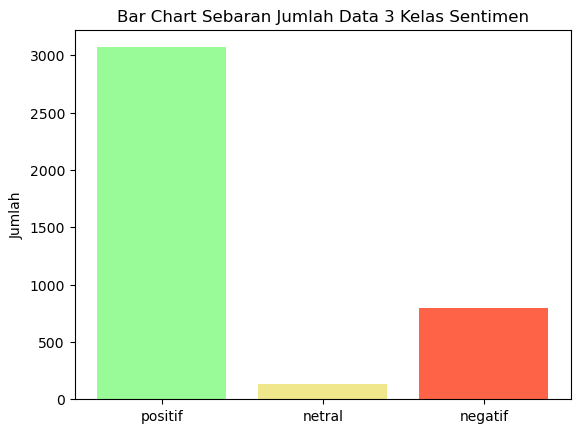

In [9]:
x_axis = ['positif', 'netral', 'negatif']
y_axis = [(sum(df['score']=='positif')), (sum(df['score']=='netral')), (sum(df['score']=='negatif'))]
c = ['palegreen','khaki','tomato']
plt.bar(x_axis, y_axis, color = c)
plt.title('Bar Chart Sebaran Jumlah Data 3 Kelas Sentimen')
plt.ylabel('Jumlah')
plt.show()

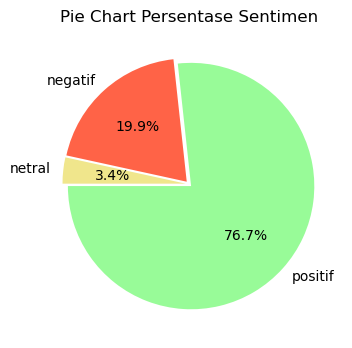

In [10]:
#Membuat PieChart
plt.figure(figsize=(8,4))
plt.title("Pie Chart Persentase Sentimen", fontsize=12)
chart = plt.pie(df.score.value_counts(),explode=(0.025,0.025,0.025), 
            labels=df.score.value_counts().index, 
            colors=['palegreen','tomato','khaki'],  
            autopct='%1.1f%%', startangle=180)
plt.show()

In [11]:
df.to_excel("labeled.xlsx")

### 4. Ekstraksi Fitur

In [2]:
# =========================================== EKSTRAKSI FITUR ===========================================
data = pd.read_excel('labeled.xlsx')
data

,Unnamed: 0,text,english,polarity,score
0,0,nikah muda nikah mudah pikir buset pikir nik a...,Marriage Young Marriage Easy Thinking Desem Th...,0.233333,positif
1,1,valid mbk embah kakung ibukku tinggal wafat em...,Valid mbk grandfather my mother lives my died ...,0.137500,positif
2,2,perempuan muda cantik didik kerja kaya hidup e...,beautiful young women students work rich lives...,0.378571,positif
3,3,buka televisi isi suami canda cewek muda canti...,Open the television filled with a husband joki...,0.190000,positif
4,4,minimo be like nuna pilih mini baper nih ayo n...,"minimo like nuna choose a mini baper, let's ge...",0.250000,positif
...,...,...,...,...,...
3995,3995,gamau nikah muda,Gamau young marriage,0.100000,positif
3996,3996,cewek nikah neymarnya gamau muda yaudah tingga...,"Girls Neymar's marriage, you don't have young ...",0.100000,positif
3997,3997,bicara nikah muda kuliah wisuda gendong anak b...,Talking about young marriage lecture graduatio...,0.066667,positif
3998,3998,nikah muda sih salah tau prinsip nikah kunci g...,young marriage is wrong to know the principle ...,0.028571,positif


In [3]:
df=pd.DataFrame(data)

Hal pertama yang dilakukan dalam tahap ini adalah membagi data menjadi dua bagian yaitu data latih dan data uji. Kode di bawah menghasilkan data uji atau _test size_ sebanyak 20% dari total keseluruhan data, dan sisanya yaitu 80% data menjadi data latih. Sehingga kode tersebut menghasilkan output 3200 data latih dan 800 data uji.

In [4]:
y=df.score.values
x=df.english.values

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state=1,
                                    test_size=0.2, shuffle=True)

print(x_train.shape)
print(x_test.shape)

(3200,)
(800,)


Tahap selanjutnya adalah mengubah isi dataset ke dalam representasi _vector_ sekaligus menerapkan _N-Gram_. Pada penelitian ini, digunakan library scikitlearn untuk mengambil _CountVectorizer_ yang dapat mengubah fitur teks menjadi sebuah representasi _vector_, kemudian parameter _N-Gram_ akan menyusun kata yang menjadi _bag of words_ berbentuk _unigram_. _Unigram_ artinya setiap representasi _vector_ akan mewakili 1 kata.

In [5]:
vectorizer = CountVectorizer(analyzer = 'word', ngram_range=(1,1), binary=True, stop_words='english')
vectorizer.fit (list(x_train) + list(x_test))

x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)
print(x_train_vec.shape)
print(x_test_vec.shape)

(3200, 5956)
(800, 5956)


### 5. Implementasi SVM
Tahap ini adalah tahap membuat model _Support Vector Machine classifier_. Pada data latih terdapat kelas sentiment positif, netral, dan negatif. SVM akan mempelajari karakteristik kata-kata yang terdapat pada masing-masing kelas pada data latih tersebut, kemudian SVM akan mencoba memprediksi kelas sentiment pada data uji sebanyak 800 data. Pada tahap pemodelan ini, dicoba tiga kernel SVM yaitu _Linear_, RBF, dan _Polynomial_ dengan nilai default pada C, _gamma_, dan _degree_ untuk mengetahui kernel apa yang paling baik akurasinya dalam mengklasifikasikan 4000 data pada penelitian ini. 

In [6]:
# =========================================== KLASIFIKASI SVM ===========================================
#Membuat Classifier SVM Linear
linear = svm.SVC(kernel='linear', C=1)
linear.fit(x_train_vec, y_train).predict(x_test_vec)

#Membuat Classifier SVM RBF
rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)
rbf.fit(x_train_vec, y_train).predict(x_test_vec)

#Membuat Classifier SVM Polynomial
poly = svm.SVC(kernel='poly', degree=3, C=1)
poly.fit(x_train_vec, y_train).predict(x_test_vec)

array(['positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'negatif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 

In [7]:
linear_pred = linear.predict(x_test_vec)
rbf_pred = rbf.predict(x_test_vec)
poly_pred = poly.predict(x_test_vec)

In [8]:
score_linear = accuracy_score(linear_pred, y_test)
score_rbf = accuracy_score(rbf_pred, y_test)
score_poly = accuracy_score(poly_pred, y_test)

print("Accuracy with Linear SVM: ",score_linear * 100, '%')
print("Accuracy with RBF SVM: ",score_rbf * 100, '%')
print("Accuracy with Polynomial SVM: ",score_poly * 100, '%')

Accuracy with Linear SVM:  87.375 %
Accuracy with RBF SVM:  83.875 %
Accuracy with Polynomial SVM:  78.625 %


disimpulkan bahwa Linear SVM memiliki performa paling baik dalam menguji data tweet pada penelitian ini. Maka dari itu, kernel tersebut adalah kernel yang akan digunakan di penelitian ini untuk evaluasi performansi dan sekaligus menjadi classifier untuk aplikasi web analisis sentimen.

### 6. Evaluasi Performansi
Untuk mengetahui performa dari metode Linear SVM, maka dilakukan pengujian terhadap model yang telah dibuat. Hasil klasifikasi akan ditampilkan dalam bentuk _confusion matrix_. _Confusion matrix_ mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya.

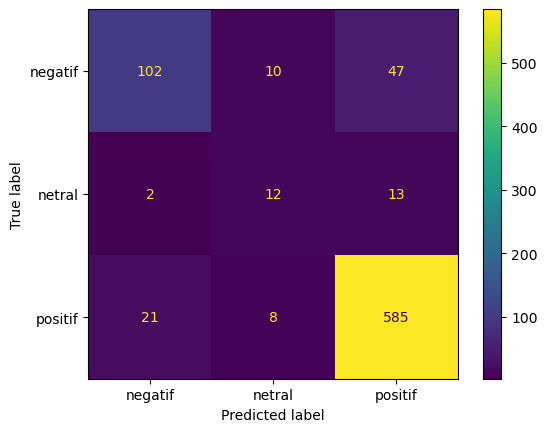

In [9]:
cm = confusion_matrix(y_test, linear_pred, labels=linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=linear.classes_)
disp.plot()
plt.show()

Model mengklasifikasikan 102 data negatif yang teridentifikasi dengan benar bersentimen negatif, 10 data negatif teridentifikasi netral, dan 47 data negatif teridentifikasi positif. 12 data netral benar teridentifikasi dengan benar bersentimen netral, 2 data netral teridentifikasi negatif, dan 13 data netral teridentifikasi positif. Kemudian 585 data positif teridentifikasi dengan benar bersentimen positif, 21 data positif teridentifikasi negatif, dan 8 data positif teridentifikasi netral.

In [10]:
print("Linear SVM Confusion Matrix: ")
print(confusion_matrix(y_test, linear_pred))

Linear SVM Confusion Matrix: 
[[102  10  47]
 [  2  12  13]
 [ 21   8 585]]


In [11]:
print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

     negatif       0.82      0.64      0.72       159
      netral       0.40      0.44      0.42        27
     positif       0.91      0.95      0.93       614

    accuracy                           0.87       800
   macro avg       0.71      0.68      0.69       800
weighted avg       0.87      0.87      0.87       800

